In [1]:
import pandas as pd

In [2]:
# Import the pandas library
import pandas as pd

# Read CSV files for different years of London listings data into DataFrames
data_2019 = pd.read_csv('Data/London-2019-11-listings.csv', low_memory=False) # Read data for November 2019
data_2020 = pd.read_csv('Data/London-2020-11-listings.csv', low_memory=False) # Read data for November 2020
data_2021 = pd.read_csv('Data/London-2021-10-listings.csv', low_memory=False) # Read data for October 2021
data_2022 = pd.read_csv('Data/London-2022-09-10-listings.csv', low_memory=False) # Read data for September 2022
data_2023 = pd.read_csv('Data/London-2023-09-06-listings.csv', low_memory=False) # Read data for September 2023

In [3]:
# Define the column names to retain and their possible variations in different year's datasets
columns_mapping = {
    'id': ['id'],  # Column name 'id'
    'name': ['name'],  # Column name 'name'
    'latitude': ['latitude'],  # Column name 'latitude'
    'longitude': ['longitude'],  # Column name 'longitude'
    'neighbourhood': ['neighbourhood', 'neighborhood', 'neighbourhood_cleansed'],  # Various column names for 'neighbourhood'
    'room_type': ['room_type'],  # Column name 'room_type'
    'price': ['price'],  # Column name 'price'
    'minimum_nights': ['minimum_nights'],  # Column name 'minimum_nights'
    'availability_365': ['availability_365'],  # Column name 'availability_365'
    'number_of_reviews': ['number_of_reviews'],  # Column name 'number_of_reviews'
    'reviews_per_month': ['reviews_per_month'],  # Column name 'reviews_per_month'
    'last_review': ['last_review'],  # Column name 'last_review'
    'host_id': ['host_id'],  # Column name 'host_id'
    'calculated_host_listings_count': [
        'calculated_host_listings_count',
        'host_total_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms'
    ]  # Various column names for 'calculated_host_listings_count'
}

In [4]:
# Apply mapping to adjust column names of a dataset
def adjust_column_names(dataframe, column_mapping):
    for standardized_name, potential_names in column_mapping.items():
        for potential_name in potential_names:
            # Check if the potential column name exists in the DataFrame
            if potential_name in dataframe.columns:
                # Rename the column to the standardized name
                dataframe.rename(columns={potential_name: standardized_name}, inplace=True)
                break  # Once found and renamed, exit the loop

In [5]:
# Apply the column name adjustments to different datasets
adjust_column_names(data_2019, columns_mapping)  # Adjust column names in the 2019 dataset
adjust_column_names(data_2020, columns_mapping)  # Adjust column names in the 2020 dataset
adjust_column_names(data_2021, columns_mapping)  # Adjust column names in the 2021 dataset
adjust_column_names(data_2022, columns_mapping)  # Adjust column names in the 2022 dataset

In [6]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85236 non-null  object
 1   name                            85235 non-null  object
 2   host_id                         85236 non-null  object
 3   host_name                       85236 non-null  object
 4   neighbourhood_group             85236 non-null  object
 5   neighbourhood                   85236 non-null  object
 6   latitude                        85236 non-null  object
 7   longitude                       85236 non-null  object
 8   room_type                       85236 non-null  object
 9   price                           85236 non-null  object
 10  minimum_nights                  85236 non-null  object
 11  number_of_reviews               85236 non-null  object
 12  last_review                     85236 non-null

In [7]:
# Function to check if columns in a DataFrame match the standardized column names
def check_ifMatched_columns(dataframe, column_mapping):
    standardized_columns = set(column_mapping.keys())  # Set of standardized column names
    dataframe_columns = set(dataframe.columns)  # Set of columns in the DataFrame
    
    # Find columns in the dataset that exist but are not in the standardized column names
    unmatched_columns = dataframe_columns - standardized_columns
    matched_columns = dataframe_columns & standardized_columns  # Columns that match the standardized names

    return unmatched_columns, matched_columns

In [8]:
# Use the function to check for unmatched columns
unmatched_columns, matched_columns = check_ifMatched_columns(data_2019, columns_mapping)

print("Unmatched columns:", unmatched_columns)  # Print the unmatched columns
print("Matched columns:", matched_columns)  # Print the matched columns

# Manually handle these columns
# Decide to delete a particular unmatched column
# data.drop(columns=['unwanted_column'], inplace=True)

# Or rename a particular unmatched column
# data.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

Unmatched columns: {'last_review_timestamp', 'neighbourhood_group', 'room_class', 'host_name'}
Matched columns: {'room_type', 'number_of_reviews', 'latitude', 'longitude', 'price', 'id', 'reviews_per_month', 'neighbourhood', 'host_id', 'last_review', 'name', 'minimum_nights', 'availability_365', 'calculated_host_listings_count'}


In [9]:
# Use the function to check for unmatched columns
unmatched_columns, matched_columns = check_ifMatched_columns(data_2020, columns_mapping)

print("Unmatched columns:", unmatched_columns)  # Print the unmatched columns
print("Matched columns:", matched_columns)  # Print the matched columns

Unmatched columns: {'host_verifications', 'amenities', 'calculated_host_listings_count_private_rooms', 'neighborhood_overview', 'neighbourhood_group_cleansed', 'calendar_last_scraped', 'host_about', 'property_type', 'host_acceptance_rate', 'number_of_reviews_ltm', 'host_response_time', 'host_location', 'review_scores_value', 'scrape_id', 'listing_url', 'minimum_maximum_nights', 'calculated_host_listings_count_shared_rooms', 'review_scores_cleanliness', 'host_since', 'review_scores_checkin', 'bathrooms_text', 'minimum_nights_avg_ntm', 'first_review', 'availability_60', 'beds', 'availability_90', 'maximum_nights', 'host_is_superhost', 'review_scores_rating', 'host_listings_count', 'availability_30', 'accommodates', 'picture_url', 'minimum_minimum_nights', 'maximum_maximum_nights', 'host_identity_verified', 'neighbourhood_cleansed', 'maximum_nights_avg_ntm', 'host_thumbnail_url', 'host_neighbourhood', 'description', 'host_has_profile_pic', 'calculated_host_listings_count_entire_homes', 'h

In [10]:
# Use the function to check for unmatched columns
unmatched_columns, matched_columns = check_ifMatched_columns(data_2021, columns_mapping)

print("Unmatched columns:", unmatched_columns)  # Display unmatched columns
print("Matched columns:", matched_columns)  # Display matched columns

Unmatched columns: {'host_verifications', 'amenities', 'calculated_host_listings_count_private_rooms', 'neighborhood_overview', 'neighbourhood_group_cleansed', 'calendar_last_scraped', 'host_about', 'property_type', 'host_acceptance_rate', 'number_of_reviews_ltm', 'host_response_time', 'host_location', 'review_scores_value', 'scrape_id', 'listing_url', 'minimum_maximum_nights', 'calculated_host_listings_count_shared_rooms', 'review_scores_cleanliness', 'host_since', 'review_scores_checkin', 'bathrooms_text', 'minimum_nights_avg_ntm', 'first_review', 'availability_60', 'beds', 'availability_90', 'maximum_nights', 'host_is_superhost', 'review_scores_rating', 'host_listings_count', 'availability_30', 'accommodates', 'picture_url', 'minimum_minimum_nights', 'maximum_maximum_nights', 'host_identity_verified', 'neighbourhood_cleansed', 'maximum_nights_avg_ntm', 'host_thumbnail_url', 'host_neighbourhood', 'description', 'host_has_profile_pic', 'calculated_host_listings_count_entire_homes', 'h

In [11]:
# Use the function to check for unmatched columns
unmatched_columns, matched_columns = check_ifMatched_columns(data_2022, columns_mapping)

print("Unmatched columns:", unmatched_columns)  # Display unmatched columns
print("Matched columns:", matched_columns)  # Display matched columns

Unmatched columns: {'host_verifications', 'amenities', 'calculated_host_listings_count_private_rooms', 'neighborhood_overview', 'neighbourhood_group_cleansed', 'calendar_last_scraped', 'host_about', 'property_type', 'host_acceptance_rate', 'number_of_reviews_ltm', 'host_response_time', 'host_location', 'review_scores_value', 'scrape_id', 'listing_url', 'minimum_maximum_nights', 'calculated_host_listings_count_shared_rooms', 'review_scores_cleanliness', 'host_since', 'review_scores_checkin', 'bathrooms_text', 'minimum_nights_avg_ntm', 'first_review', 'availability_60', 'beds', 'availability_90', 'maximum_nights', 'host_is_superhost', 'review_scores_rating', 'host_listings_count', 'availability_30', 'accommodates', 'picture_url', 'minimum_minimum_nights', 'maximum_maximum_nights', 'host_identity_verified', 'neighbourhood_cleansed', 'maximum_nights_avg_ntm', 'source', 'host_thumbnail_url', 'host_neighbourhood', 'description', 'host_has_profile_pic', 'calculated_host_listings_count_entire_

In [12]:
# Use the function to check for unmatched columns
unmatched_columns, matched_columns = check_ifMatched_columns(data_2023, columns_mapping)

print("Unmatched columns:", unmatched_columns)  # Display unmatched columns
print("Matched columns:", matched_columns)  # Display matched columns

Unmatched columns: {'license', 'host_name', 'neighbourhood_group', 'number_of_reviews_ltm'}
Matched columns: {'room_type', 'number_of_reviews', 'latitude', 'longitude', 'price', 'id', 'reviews_per_month', 'neighbourhood', 'host_id', 'last_review', 'name', 'minimum_nights', 'availability_365', 'calculated_host_listings_count'}


In [13]:
# Define the columns that are common to all datasets
matched_columns = ['host_id', 'id', 'calculated_host_listings_count', 'name', 'minimum_nights', 'latitude', 'room_type', 'price', 'availability_365', 'number_of_reviews', 'longitude', 'last_review', 'neighbourhood', 'reviews_per_month']

# Ensure that each dataset only contains these matched columns and create copies
data_2019_selected = data_2019[matched_columns].copy()
data_2020_selected = data_2020[matched_columns].copy()
data_2021_selected = data_2021[matched_columns].copy()
data_2022_selected = data_2022[matched_columns].copy()
data_2023_selected = data_2023[matched_columns].copy()

# Add a 'year' column to each dataset
data_2019_selected['year'] = 2019
data_2020_selected['year'] = 2020
data_2021_selected['year'] = 2021
data_2022_selected['year'] = 2022
data_2023_selected['year'] = 2023

# Merge the datasets
all_data = pd.concat([data_2019_selected, data_2020_selected, data_2021_selected, data_2022_selected, data_2023_selected])

# Reset the index
all_data.reset_index(drop=True, inplace=True)

In [14]:
all_data.info()
all_data.head()
all_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390135 entries, 0 to 390134
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   host_id                         390135 non-null  object
 1   id                              390135 non-null  object
 2   calculated_host_listings_count  390135 non-null  object
 3   name                            390066 non-null  object
 4   minimum_nights                  390135 non-null  object
 5   latitude                        390135 non-null  object
 6   room_type                       390135 non-null  object
 7   price                           390135 non-null  object
 8   availability_365                390135 non-null  object
 9   number_of_reviews               390135 non-null  object
 10  longitude                       390135 non-null  object
 11  last_review                     308377 non-null  object
 12  neighbourhood                 

(390135, 15)

In [15]:
# Calculate the number of rows containing at least one missing value
num_rows_with_missing_values = all_data.isna().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {num_rows_with_missing_values}")

Number of rows with at least one missing value: 134065


In [16]:
# Calculate the number of missing values per column
missing_values_per_column = all_data.isna().sum()

# Print the number of missing values for each column
print(missing_values_per_column)

host_id                               0
id                                    0
calculated_host_listings_count        0
name                                 69
minimum_nights                        0
latitude                              0
room_type                             0
price                                 0
availability_365                      0
number_of_reviews                     0
longitude                             0
last_review                       81758
neighbourhood                     87128
reviews_per_month                 81758
year                                  0
dtype: int64


In [17]:
# Remove rows with missing values in the 'name' column
all_data.dropna(subset=['name'], inplace=True)

# Calculate the mode of 'last_review' for each year
mode_per_year = all_data.groupby('year')['last_review'].agg(pd.Series.mode)

# Fill missing values in 'last_review' with the mode for each respective year
for year in mode_per_year.index:
    mode = mode_per_year[year]
    # If the mode is a series, take the first element
    if isinstance(mode, pd.Series):
        mode = mode.iloc[0]
    all_data.loc[all_data['year'] == year, 'last_review'] = all_data.loc[all_data['year'] == year, 'last_review'].fillna(mode)

# Ensure 'reviews_per_month' column is of numeric type
all_data['reviews_per_month'] = pd.to_numeric(all_data['reviews_per_month'], errors='coerce')

# Calculate the mean of 'reviews_per_month' for each year
mean_per_year = all_data.groupby('year')['reviews_per_month'].mean()

# Fill missing values in 'reviews_per_month' with the mean for each respective year
for year in mean_per_year.index:
    mean = mean_per_year[year]
    all_data.loc[all_data['year'] == year, 'reviews_per_month'] = all_data.loc[all_data['year'] == year, 'reviews_per_month'].fillna(mean)

# Fill missing values in 'neighbourhood' column with "Unknown"
all_data['neighbourhood'].fillna("Unknown", inplace=True)

# Print the number of missing values in each column
print(all_data.isna().sum())

host_id                           0
id                                0
calculated_host_listings_count    0
name                              0
minimum_nights                    0
latitude                          0
room_type                         0
price                             0
availability_365                  0
number_of_reviews                 0
longitude                         0
last_review                       0
neighbourhood                     0
reviews_per_month                 0
year                              0
dtype: int64


In [18]:
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 390066 entries, 0 to 390134
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_id                         390066 non-null  object 
 1   id                              390066 non-null  object 
 2   calculated_host_listings_count  390066 non-null  object 
 3   name                            390066 non-null  object 
 4   minimum_nights                  390066 non-null  object 
 5   latitude                        390066 non-null  object 
 6   room_type                       390066 non-null  object 
 7   price                           390066 non-null  object 
 8   availability_365                390066 non-null  object 
 9   number_of_reviews               390066 non-null  object 
 10  longitude                       390066 non-null  object 
 11  last_review                     390066 non-null  object 
 12  neighbourhood        

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35,278,47,-.379,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572,23013522,3,"Spacious room with double bed for 2, Twickenham",1,51.45867,Private room,19,23,131,-.34444,2019-11-06,Hounslow,6.52,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103,317,8,-.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.52716,Entire home/apt,85,346,5,-.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85,139,16,-.1667,2019-11-06,Barnet,1.52,2019


In [19]:
# First, remove non-numeric characters from the 'price' column (such as currency symbols, commas, spaces, etc.)
all_data['price'] = all_data['price'].replace('[\$, ]', '', regex=True)

# Convert the strings to numeric values
# Define the column names that need to be converted to numeric
numeric_columns = ['host_id', 'id', 'calculated_host_listings_count', 'minimum_nights', 'latitude', 'availability_365', 'number_of_reviews', 'longitude', 'reviews_per_month', 'price']

# Loop through each column name and convert it to numeric type
for column in numeric_columns:
    all_data[column] = pd.to_numeric(all_data[column], errors='coerce')

# Check the data types after conversion
print(all_data.dtypes)

# Display the first few rows of the updated DataFrame
all_data.head()

host_id                           float64
id                                float64
calculated_host_listings_count    float64
name                               object
minimum_nights                    float64
latitude                          float64
room_type                          object
price                             float64
availability_365                  float64
number_of_reviews                 float64
longitude                         float64
last_review                        object
neighbourhood                      object
reviews_per_month                 float64
year                                int64
dtype: object


,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995.0,9582415.0,1.0,Single/Twin/Double Ensuite near Twickenham Sta...,1.0,51.44473,Private room,35.0,278.0,47.0,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572.0,23013522.0,3.0,"Spacious room with double bed for 2, Twickenham",1.0,51.45867,Private room,19.0,23.0,131.0,-0.34444,2019-11-06,Hounslow,6.52,2019
2,25587547.0,25796711.0,1.0,Stunning Central London Apartment Close The River,7.0,51.47398,Entire home/apt,103.0,317.0,8.0,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790.0,29060134.0,1.0,Recently renovated fabulous four bedroom house,14.0,51.52716,Entire home/apt,85.0,346.0,5.0,-0.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684.0,30374086.0,3.0,Lovely cosy flat for 4 in Heart of North London,3.0,51.59118,Entire home/apt,85.0,139.0,16.0,-0.16670,2019-11-06,Barnet,1.52,2019


In [20]:
# Define the column names that need to be converted to integers
integer_columns = ['host_id', 'id', 'calculated_host_listings_count', 'minimum_nights', 'availability_365', 'number_of_reviews']

# Loop through each column name and convert it to integer type
for column in integer_columns:
    # Convert the column to numeric, handle conversion errors by replacing with NaN, and then convert to integer
    all_data[column] = pd.to_numeric(all_data[column], errors='coerce').fillna(0).astype(int)

# Check the data types after conversion
print(all_data.dtypes)

# Display the first few rows of the updated DataFrame
all_data.head()

host_id                             int64
id                                  int64
calculated_host_listings_count      int64
name                               object
minimum_nights                      int64
latitude                          float64
room_type                          object
price                             float64
availability_365                    int64
number_of_reviews                   int64
longitude                         float64
last_review                        object
neighbourhood                      object
reviews_per_month                 float64
year                                int64
dtype: object


,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572,23013522,3,"Spacious room with double bed for 2, Twickenham",1,51.45867,Private room,19.0,23,131,-0.34444,2019-11-06,Hounslow,6.52,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.52716,Entire home/apt,85.0,346,5,-0.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019


In [21]:
# Loop through each column in the dataset
for column in all_data.columns:
    # Check if the data type of the column is 'object'
    if all_data[column].dtype == 'object':
        # Convert columns of 'object' data type to strings
        all_data[column] = all_data[column].astype(str)

# Check the data types after conversion
print(all_data.dtypes)

host_id                             int64
id                                  int64
calculated_host_listings_count      int64
name                               object
minimum_nights                      int64
latitude                          float64
room_type                          object
price                             float64
availability_365                    int64
number_of_reviews                   int64
longitude                         float64
last_review                        object
neighbourhood                      object
reviews_per_month                 float64
year                                int64
dtype: object


In [22]:
# Adjust the regular expression pattern to match the format yyyy-mm-dd
date_pattern = r'\d{4}-\d{1,2}-\d{1,2}'

# Ensure the 'last_review' column is of string type
all_data['last_review'] = all_data['last_review'].astype(str)

# Use regular expression to check each value in the 'last_review' field
# If a value does not match the date format yyyy-mm-dd, replace it with NaT (Not-a-Time)
all_data['last_review'] = pd.to_datetime(
    all_data['last_review'].str.extract(f'(^{date_pattern}$)', expand=False), 
    errors='coerce'
)

# Remove rows in the 'last_review' column where the value is NaT
all_data = all_data.dropna(subset=['last_review'])

# Check the remaining data in the 'last_review' column
print(all_data['last_review'].head())

0   2019-11-06
1   2019-11-06
2   2019-11-06
3   2019-11-06
4   2019-11-06
Name: last_review, dtype: datetime64[ns]


In [23]:
import os

# 创建 Data 文件夹
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# 导出 DataFrame 到 CSV 文件
output_file = os.path.join(data_folder, "all_data.csv")
all_data.to_csv(output_file, index=False)

In [24]:
cd work/clean data


[Errno 2] No such file or directory: 'work/clean data'
/home/jovyan/work/FSDS_Group_Work


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import pandas as pd

data = pd.read_csv('Data_clean/all_data.csv')

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


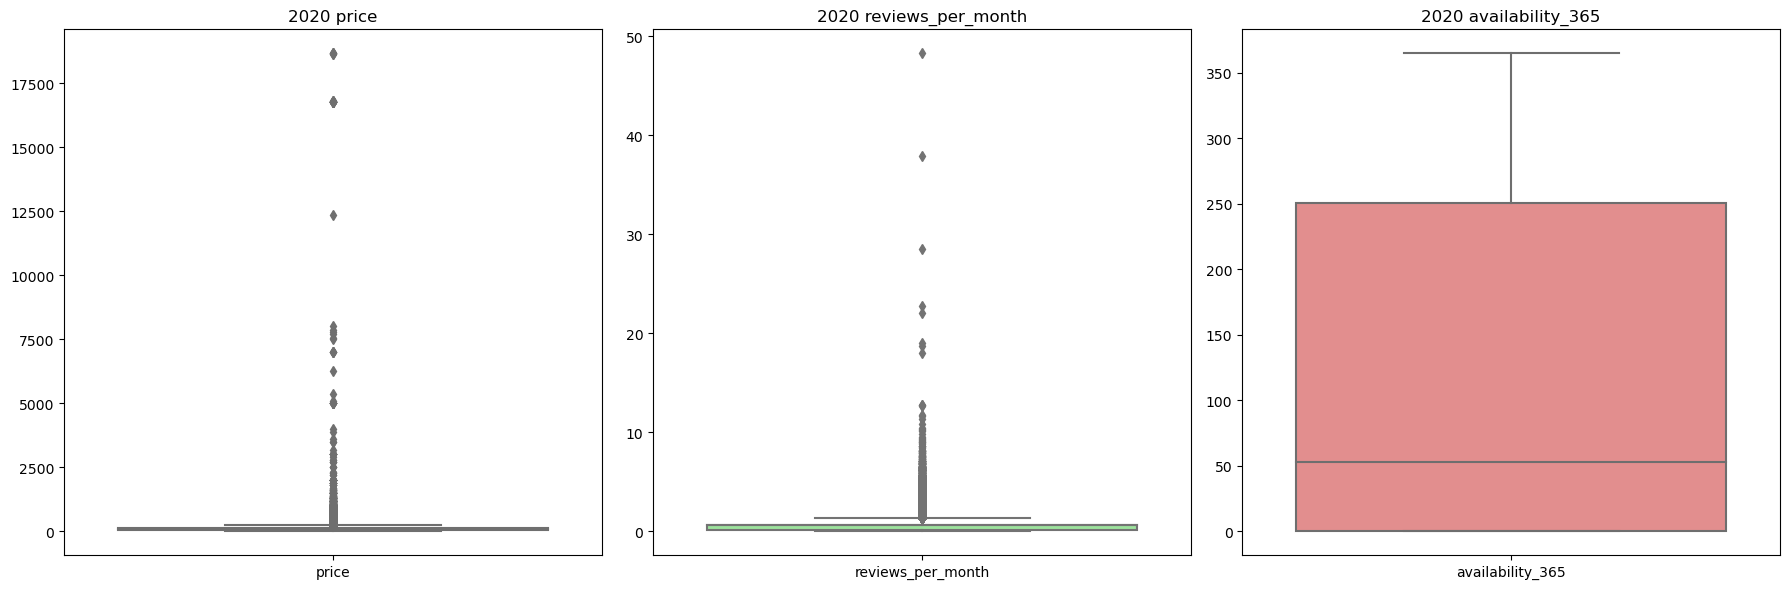

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


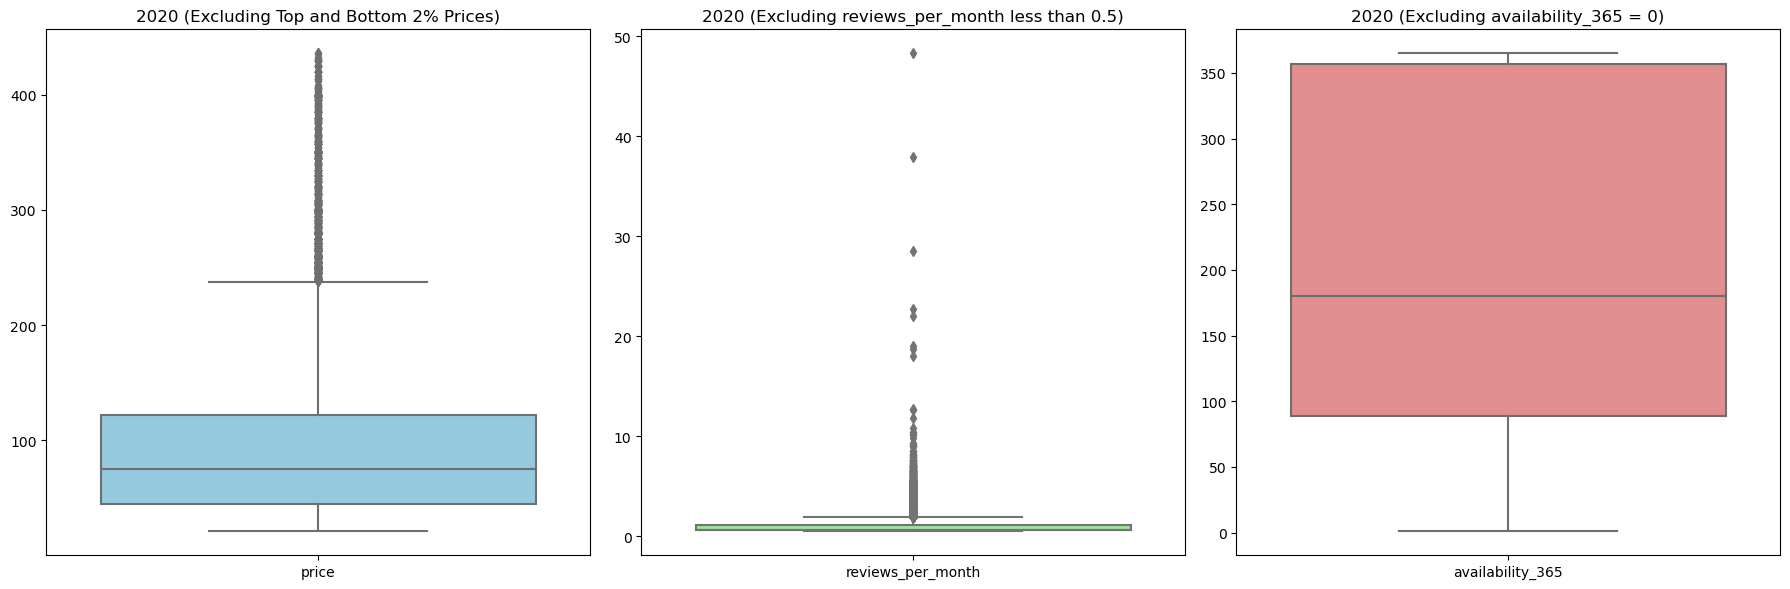

In [27]:
# Boxplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the year 2020
data_2020 = data[data['year'] == 2020]

# Create boxplots for 'price', 'reviews_per_month', and 'availability_365'
plt.figure(figsize=(18, 6))

# Boxplot for price
plt.subplot(1, 3, 1)
sns.boxplot(data_2020[['price']], color='skyblue')
plt.title('2020 price')

# Boxplot for reviews per month
plt.subplot(1, 3, 2)
sns.boxplot(data_2020[['reviews_per_month']], color='lightgreen')
plt.title('2020 reviews_per_month')

# Boxplot for availability per year
plt.subplot(1, 3, 3)
sns.boxplot(data_2020[['availability_365']], color='lightcoral')
plt.title('2020 availability_365')

plt.tight_layout()
plt.show()

# Calculate the 2% and 98% quantiles for price to identify outliers
lower_bound_price = data_2020['price'].quantile(0.02)
upper_bound_price = data_2020['price'].quantile(0.98)

# Filter out outliers
filtered_data = data_2020[
    (data_2020['price'] > lower_bound_price) & 
    (data_2020['price'] < upper_bound_price) 
]

filtered_data1 = filtered_data[(filtered_data['reviews_per_month'] > 0.5)]
filtered_data2 = filtered_data1[(filtered_data1['availability_365'] > 0)]

# Create boxplots for filtered data
plt.figure(figsize=(18, 6))

# Boxplot for filtered price data
plt.subplot(1, 3, 1)
sns.boxplot(filtered_data2[['price']], color='skyblue')
plt.title('2020 (Excluding Top and Bottom 2% Prices)')

# Boxplot for filtered reviews per month data
plt.subplot(1, 3, 2)
sns.boxplot(filtered_data2[['reviews_per_month']], color='lightgreen')
plt.title('2020 (Excluding reviews_per_month less than 0.5)')

# Boxplot for filtered availability per year data
plt.subplot(1, 3, 3)
sns.boxplot(filtered_data2[['availability_365']], color='lightcoral')
plt.title('2020 (Excluding availability_365 = 0)')

plt.tight_layout()
plt.show()


In [28]:
lower_bound_price = data['price'].quantile(0.02)
upper_bound_price = data['price'].quantile(0.98)

clean_data = data[
    (data['price'] > lower_bound_price) & 
    (data['price'] < upper_bound_price) 
]


clean_data1=clean_data[(clean_data['reviews_per_month'] > 0.5)]
clean_data2=clean_data1[(clean_data1['availability_365'] > 0)]

clean_data

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.444730,Private room,35.0,278,47,-0.379000,2019-11-06,Richmond upon Thames,2.270000,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.473980,Entire home/apt,103.0,317,8,-0.215310,2019-11-06,Hammersmith and Fulham,0.510000,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.527160,Entire home/apt,85.0,346,5,-0.441640,2019-11-06,Hillingdon,0.400000,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.591180,Entire home/apt,85.0,139,16,-0.166700,2019-11-06,Barnet,1.520000,2019
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.379600,Private room,32.0,140,50,-0.275610,2019-11-06,Kingston upon Thames,5.170000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369764,498408783,973781286754517248,2,Rental unit in Greater London · ★New · 1 bedro...,2,51.514860,Entire home/apt,275.0,239,0,-0.135980,2023-08-20,Westminster,1.014894,2023
369765,36645347,973801695874775296,1,Rental unit in Greater London · ★New · 1 bedro...,3,51.459042,Entire home/apt,145.0,88,0,-0.055458,2023-08-20,Southwark,1.014894,2023
369766,340514057,973811685656289792,1,Home in Greater London · ★New · 1 bedroom · 5 ...,1,51.406100,Private room,160.0,80,0,-0.236126,2023-08-20,Merton,1.014894,2023
369767,439074505,973882998775927936,170,Home in Greater London · ★New · 5 bedrooms · 5...,1,51.450997,Entire home/apt,680.0,364,0,-0.444319,2023-08-20,Hounslow,1.014894,2023


In [29]:
room_type_share_by_year = clean_data2.groupby(['year', 'room_type']).size() / clean_data2.groupby('year').size()
room_type_share_by_year

year  room_type      
2019  Entire home/apt    0.564989
      Hotel room         0.012718
      Private room       0.419170
      Shared room        0.003123
2020  Entire home/apt    0.546810
      Hotel room         0.007736
      Private room       0.438689
      Shared room        0.006765
2021  Entire home/apt    0.563581
      Hotel room         0.004641
      Private room       0.423087
      Shared room        0.008691
2022  Entire home/apt    0.622375
      Hotel room         0.002093
      Private room       0.369289
      Shared room        0.006243
2023  Entire home/apt    0.644266
      Hotel room         0.001476
      Private room       0.349926
      Shared room        0.004332
dtype: float64

In [30]:
count_by_year = clean_data2.groupby('year')['id'].count()
count_by_year

year
2019    31059
2020    26757
2021    23702
2022    27710
2023    41323
Name: id, dtype: int64

In [31]:
average_price_by_year = clean_data2.groupby('year')['price'].mean()
average_price_by_year

year
2019    106.888535
2020    104.586837
2021    122.325627
2022    160.094381
2023    158.209375
Name: price, dtype: float64

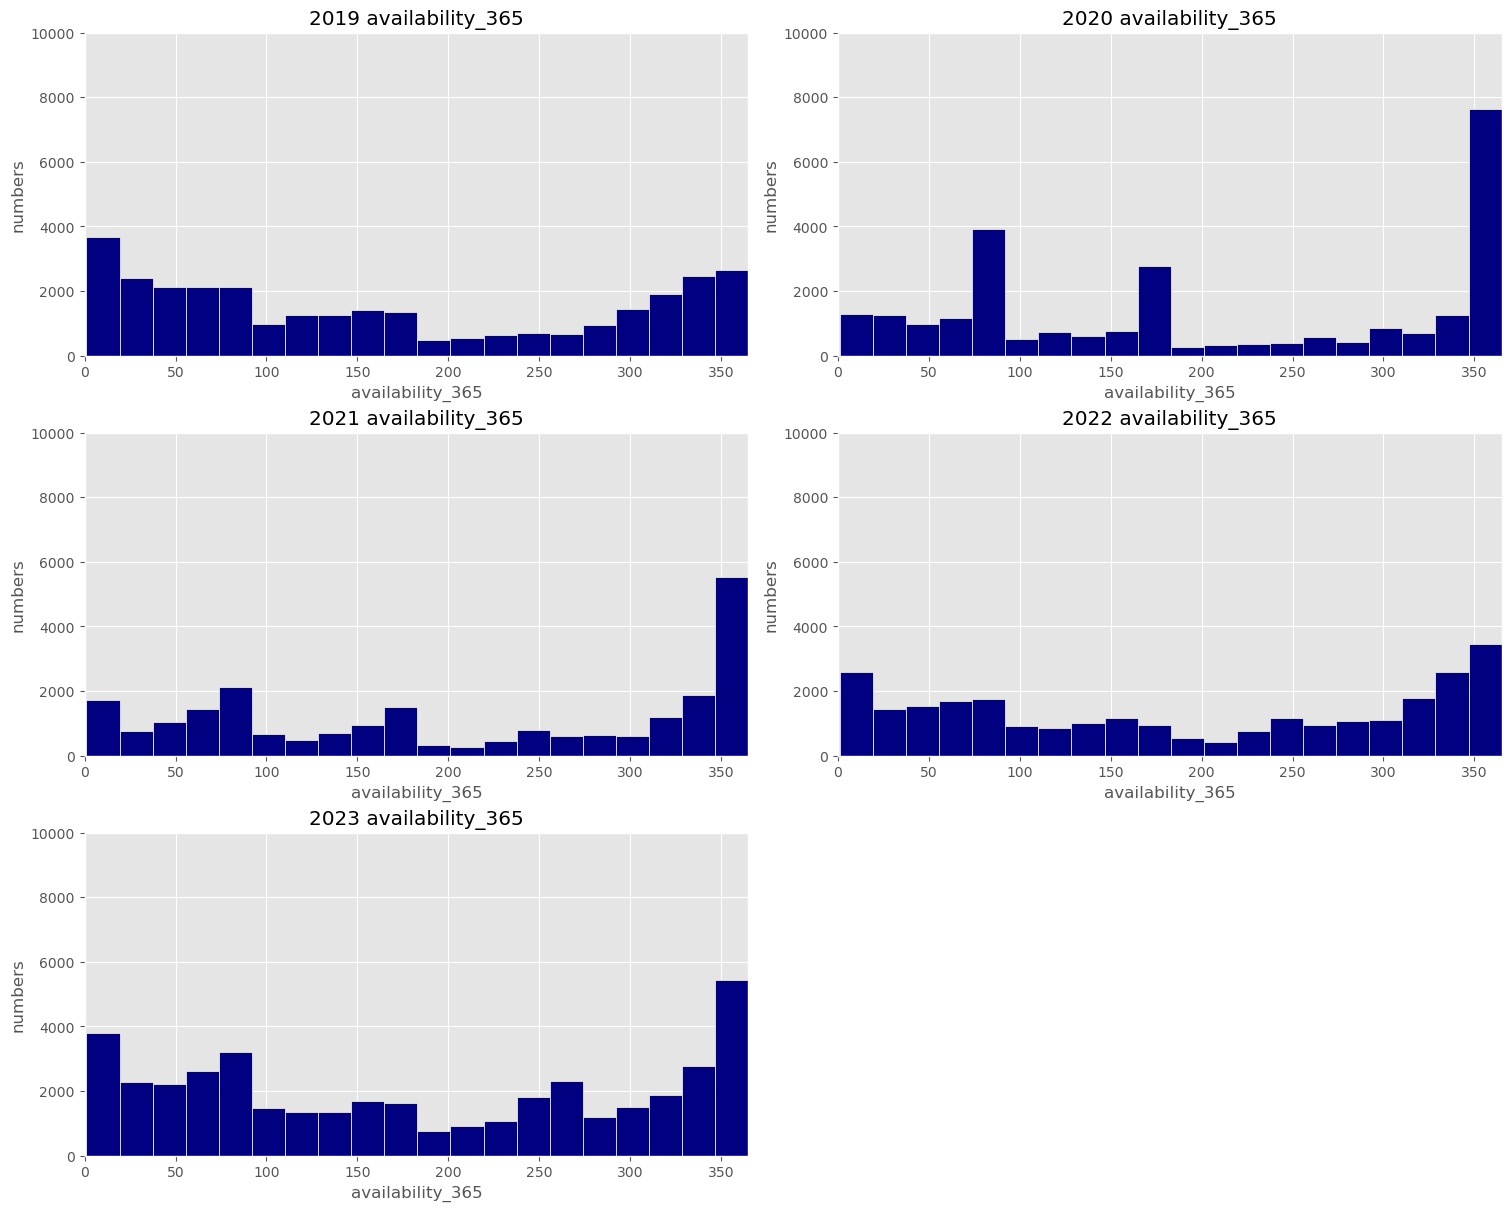

In [32]:
# Histogram

# Set the overall style of the chart to ggplot
plt.style.use('ggplot')

# Prepare data: Separate data for each year
data_by_year = {
    2019: clean_data2[clean_data2['year'] == 2019]['availability_365'].dropna(),
    2020: clean_data2[clean_data2['year'] == 2020]['availability_365'].dropna(),
    2021: clean_data2[clean_data2['year'] == 2021]['availability_365'].dropna(),
    2022: clean_data2[clean_data2['year'] == 2022]['availability_365'].dropna(),
    2023: clean_data2[clean_data2['year'] == 2023]['availability_365'].dropna()
}

# Set the number of bins for the histogram
bins = 20

# Create a histogram
fig, axs = plt.subplots(3, 2, figsize=(15, 12), constrained_layout=True)

# Remove the bottom-right subplot (empty)
axs[-1, -1].remove()

# Create a histogram for each year
for i, (year, prices) in enumerate(data_by_year.items()):
    ax = axs[i//2, i%2]
    ax.hist(prices, bins=bins, color='navy', edgecolor='white')
    ax.set_title(f'{year} availability_365')
    ax.set_xlabel('availability_365')
    ax.set_ylabel('numbers')
    ax.set_ylim([0, 10000])
    ax.set_xlim([0, 365])
    ax.grid(True)

# Display the chart
plt.show()


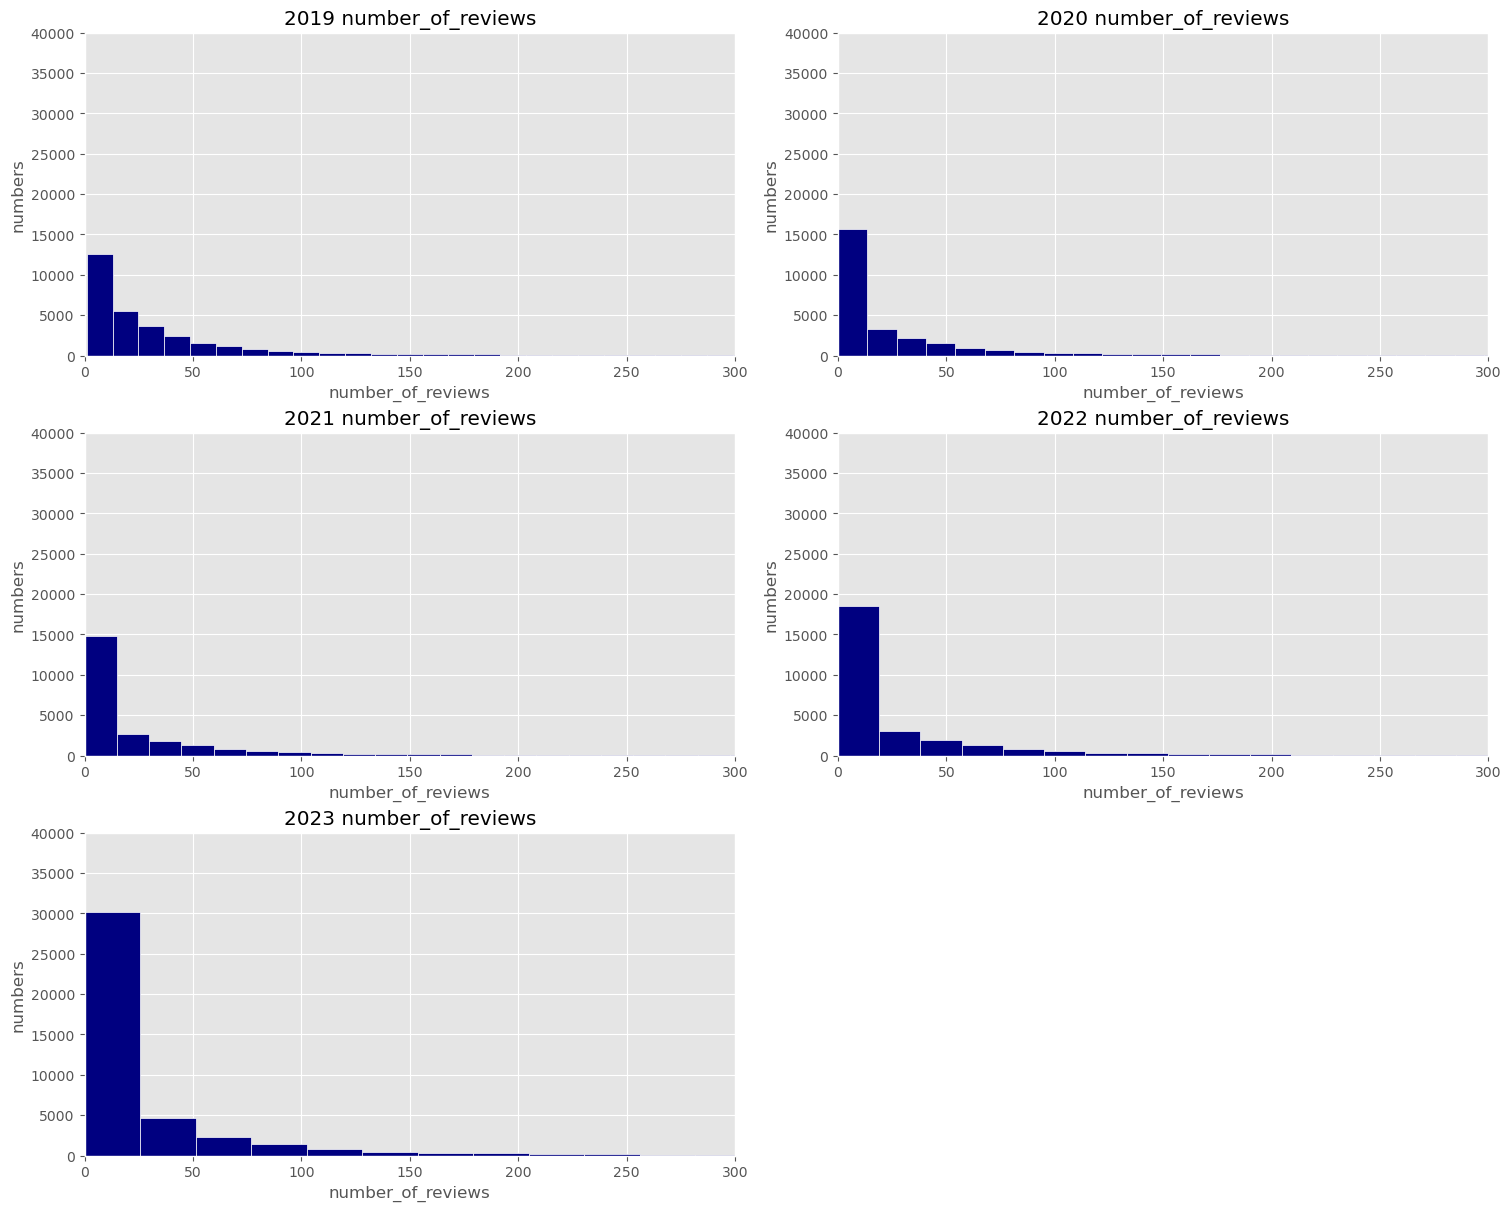

In [33]:
#histogram

# Set the overall style of the chart to ggplot
plt.style.use('ggplot')

# Prepare data: Separate data for each year
data_by_year = {
    2019: clean_data2[clean_data2['year'] == 2019]['number_of_reviews'].dropna(),
    2020: clean_data2[clean_data2['year'] == 2020]['number_of_reviews'].dropna(),
    2021: clean_data2[clean_data2['year'] == 2021]['number_of_reviews'].dropna(),
    2022: clean_data2[clean_data2['year'] == 2022]['number_of_reviews'].dropna(),
    2023: clean_data2[clean_data2['year'] == 2023]['number_of_reviews'].dropna()
}

# Set the number of bins for the histogram
bins = 60

# Create a histogram
fig, axs = plt.subplots(3, 2, figsize=(15, 12), constrained_layout=True)

axs[-1, -1].remove()

# Create a histogram for each year
for i, (year, prices) in enumerate(data_by_year.items()):
    ax = axs[i//2, i%2]
    ax.hist(prices, bins=bins, color='navy', edgecolor='white')
    ax.set_title(f'{year} number_of_reviews')
    ax.set_xlabel('number_of_reviews')
    ax.set_ylabel('numbers')
    ax.set_ylim([0, 40000])
    ax.set_xlim([0, 300])
    ax.grid(True)

# Display the chart 
plt.show()

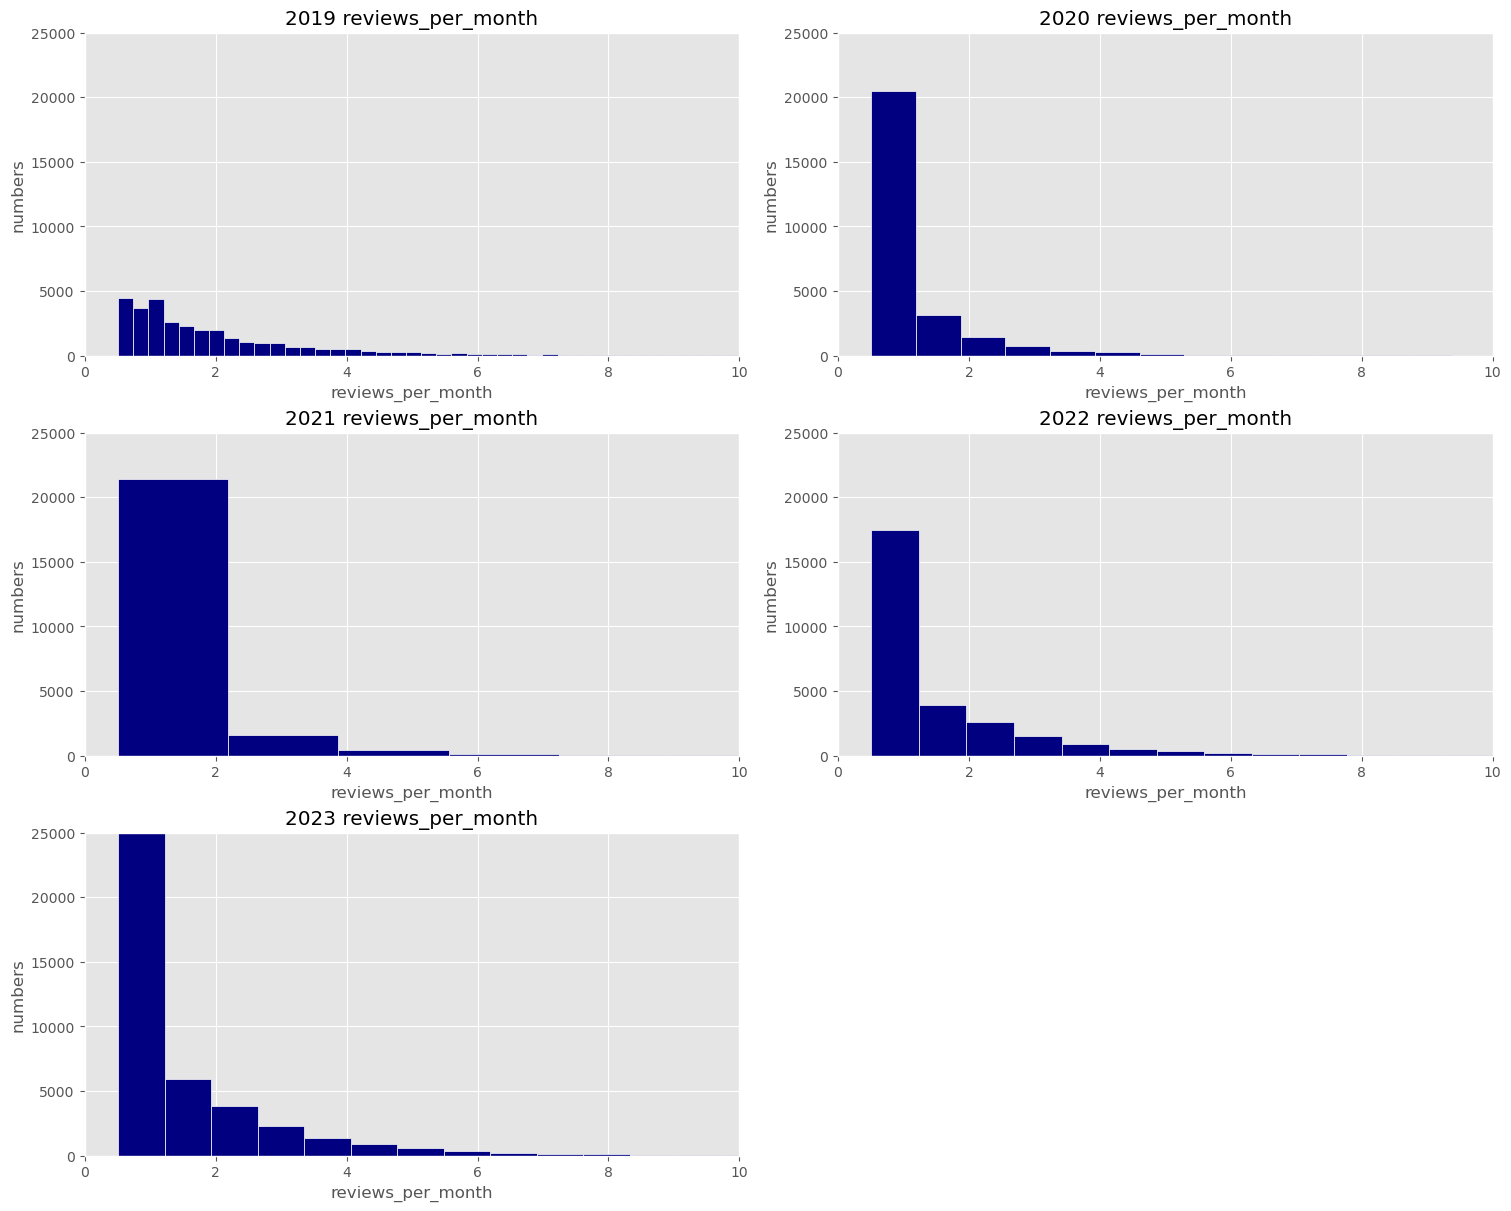

In [34]:
#histogram

# Set the overall style of the chart to ggplot
plt.style.use('ggplot')

# Prepare data: Separate data for each year
data_by_year = {
    2019: clean_data2[clean_data2['year'] == 2019]['reviews_per_month'].dropna(),
    2020: clean_data2[clean_data2['year'] == 2020]['reviews_per_month'].dropna(),
    2021: clean_data2[clean_data2['year'] == 2021]['reviews_per_month'].dropna(),
    2022: clean_data2[clean_data2['year'] == 2022]['reviews_per_month'].dropna(),
    2023: clean_data2[clean_data2['year'] == 2023]['reviews_per_month'].dropna()
}

# Set the number of bins for the histogram
bins =70

# Create a histogram
fig, axs = plt.subplots(3, 2, figsize=(15, 12), constrained_layout=True)

axs[-1, -1].remove()

# Create a histogram for each year
for i, (year, prices) in enumerate(data_by_year.items()):
    ax = axs[i//2, i%2]
    ax.hist(prices, bins=bins, color='navy', edgecolor='white')
    ax.set_title(f'{year} reviews_per_month')
    ax.set_xlabel('reviews_per_month')
    ax.set_ylabel('numbers')
    ax.set_ylim([0, 25000])
    ax.set_xlim([0, 10])
    ax.grid(True)


# Display the chart
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

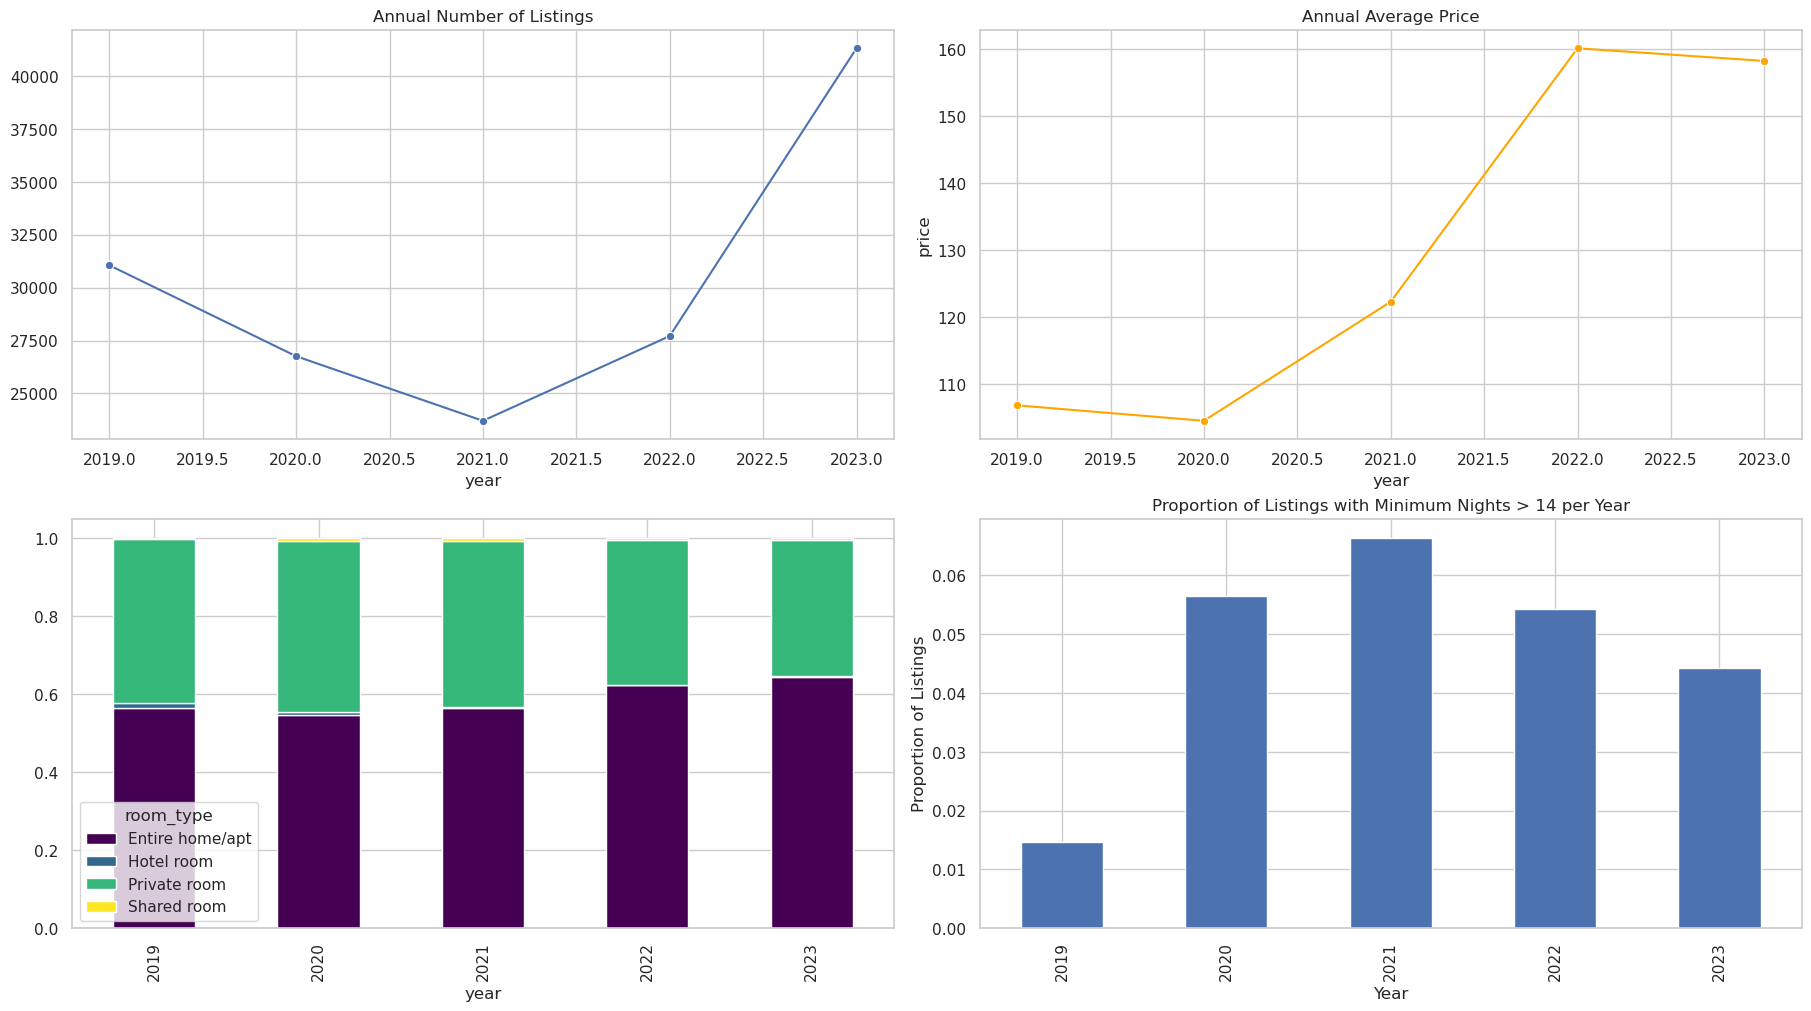

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Analysis
# Analysis of listing counts and price fluctuations
annual_listing_counts = clean_data2.groupby('year').size()
annual_price_means = clean_data2.groupby('year')['price'].mean()

# Analysis of market share of room types
room_type_annual_distribution = clean_data2.groupby(['year', 'room_type']).size().unstack(fill_value=0)
room_type_annual_shares = room_type_annual_distribution.div(room_type_annual_distribution.sum(axis=1), axis=0)

# Set the chart style
sns.set(style="whitegrid")

# Create the chart layout
fig, axes = plt.subplots(2, 2, figsize=(18, 10), constrained_layout=True)

# Charts for listing counts and price fluctuations
# Line chart - Trends in the number of listings and average prices
sns.lineplot(data=annual_listing_counts, ax=axes[0, 0], marker='o')
sns.lineplot(data=annual_price_means, ax=axes[0, 1], color='orange', marker='o')

axes[0, 0].set_title('Annual Number of Listings')
axes[0, 1].set_title('Annual Average Price')

# Chart for room type market shares
# Stacked bar chart - Changes in market shares of different room types
room_type_annual_shares.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')

# Data Analysis
# Calculate the total number of listings and listings over 14 nights per year
yearly_stats = clean_data2.groupby('year').agg(
    Total_Listings=pd.NamedAgg(column='minimum_nights', aggfunc='size'),
    Listings_Over_14_Nights=pd.NamedAgg(column='minimum_nights', aggfunc=lambda x: (x > 14).sum())
)

# Calculate the proportion of listings with minimum nights over 14
yearly_stats['Proportion_Over_14_Nights'] = yearly_stats['Listings_Over_14_Nights'] / yearly_stats['Total_Listings']

# Plot the results
yearly_stats['Proportion_Over_14_Nights'].plot(kind='bar')
plt.title('Proportion of Listings with Minimum Nights > 14 per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Listings')

# Display the charts
plt.show()


In [36]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels import RandomEffects
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_csv("Data_clean/all_data.csv", encoding="ISO-8859-1",parse_dates=['last_review'])

In [39]:
df.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572,23013522,3,"Spacious room with double bed for 2, Twickenham",1,51.45867,Private room,19.0,23,131,-0.34444,2019-11-06,Hounslow,6.52,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.52716,Entire home/apt,85.0,346,5,-0.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019


In [40]:
df.dtypes

host_id                                    int64
id                                         int64
calculated_host_listings_count             int64
name                                      object
minimum_nights                             int64
latitude                                 float64
room_type                                 object
price                                    float64
availability_365                           int64
number_of_reviews                          int64
longitude                                float64
last_review                       datetime64[ns]
neighbourhood                             object
reviews_per_month                        float64
year                                       int64
dtype: object

In [41]:
df_filtered = df[df["reviews_per_month"] > 0.5]
#define active offers as those listings which could be booked at least for one night in the following 60 days at the moment of scraping.
#Use the number of reviews to estimate the number of bookings, thereby selecting properties with more than 0.5 reviews per month as effective listings
#The analysis was restricted to active listings throughout the analysis.

In [42]:
top_2_percent = df_filtered["price"].quantile(0.98)
bottom_2_percent = df_filtered["price"].quantile(0.02)
#the average price was calculated for each city and month, based on the nightly price of available listings. 
#To eliminate outlier observations, the top 2% and bottom 2% percentile of offers were not taken into consideration. 

In [43]:
df_filtered1 = df_filtered[
    (df_filtered["price"] >= bottom_2_percent) & (df_filtered["price"] <= top_2_percent)
]

In [44]:
df_filtered1.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019


In [45]:
df_filtered2 = df_filtered1[df_filtered1["availability_365"] > 0]

In [46]:
df_filtered2.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019


In [47]:
df_filtered2.dtypes

host_id                                    int64
id                                         int64
calculated_host_listings_count             int64
name                                      object
minimum_nights                             int64
latitude                                 float64
room_type                                 object
price                                    float64
availability_365                           int64
number_of_reviews                          int64
longitude                                float64
last_review                       datetime64[ns]
neighbourhood                             object
reviews_per_month                        float64
year                                       int64
dtype: object

In [48]:
df_filtered3 = df_filtered2[
    (df_filtered2["last_review"].dt.year >= 2019)
    & (df_filtered2["last_review"].dt.year <= 2023)
]
#Properties that received reviews between 2019 and 2023 are determined to be effective listings.

In [49]:
columns_to_normalize = ["availability_365", "number_of_reviews", "reviews_per_month"]

In [50]:
scaler = MinMaxScaler()# Creating a Normaliser Instance

In [51]:
# Normalise selected columns and create new columns

df_filtered3["availability_365" + "_normalized"] = scaler.fit_transform(
    df_filtered3[["availability_365"]]
)

# Show first few rows of data to validate results
df_filtered3.head()

/tmp/ipykernel_13964/4286884628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["availability_365" + "_normalized"] = scaler.fit_transform(


,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year,availability_365_normalized
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019,0.760989
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019,0.868132
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019,0.379121
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019,0.381868
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019,0.428571


In [52]:
df_filtered3["number_of_reviews" + "_normalized"] = scaler.fit_transform(
    df_filtered3[["number_of_reviews"]]
)
df_filtered3["reviews_per_month" + "_normalized"] = scaler.fit_transform(
    df_filtered3[["reviews_per_month"]]
)

/tmp/ipykernel_13964/1637088241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["number_of_reviews" + "_normalized"] = scaler.fit_transform(
/tmp/ipykernel_13964/1637088241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["reviews_per_month" + "_normalized"] = scaler.fit_transform(


In [53]:
df_filtered3["market_activity"] = (
    df_filtered3["availability_365_normalized"]
    + df_filtered3["number_of_reviews_normalized"]
    + df_filtered3["reviews_per_month_normalized"]
)

/tmp/ipykernel_13964/2071844040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["market_activity"] = (


In [54]:
df_filtered3.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year,availability_365_normalized,number_of_reviews_normalized,reviews_per_month_normalized,market_activity
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019,0.760989,0.030599,0.014943,0.806531
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019,0.868132,0.005208,0.000000,0.873340
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019,0.379121,0.010417,0.008575,0.398113
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019,0.381868,0.032552,0.039565,0.453986
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019,0.428571,0.009766,0.018509,0.456846


In [55]:
df_filtered3["year_copy"] = df_filtered3["year"]

/tmp/ipykernel_13964/3524362711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["year_copy"] = df_filtered3["year"]


In [56]:
# Assumes COVID period of 2020 and 2021
df_filtered3["covid_period"] = df_filtered3["year"].isin([2020, 2021]).astype(int)

/tmp/ipykernel_13964/3922237936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["covid_period"] = df_filtered3["year"].isin([2020, 2021]).astype(int)


In [57]:
df_filtered3.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,...,last_review,neighbourhood,reviews_per_month,year,availability_365_normalized,number_of_reviews_normalized,reviews_per_month_normalized,market_activity,year_copy,covid_period
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,...,2019-11-06,Richmond upon Thames,2.27,2019,0.760989,0.030599,0.014943,0.806531,2019,0
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,...,2019-11-06,Hammersmith and Fulham,0.51,2019,0.868132,0.005208,0.000000,0.873340,2019,0
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,...,2019-11-06,Barnet,1.52,2019,0.379121,0.010417,0.008575,0.398113,2019,0
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,...,2019-11-06,Kingston upon Thames,5.17,2019,0.381868,0.032552,0.039565,0.453986,2019,0
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,...,2019-11-06,Harrow,2.69,2019,0.428571,0.009766,0.018509,0.456846,2019,0


In [58]:
df_filtered3["year_2019"] = (df_filtered3["year"] == 2019).astype(int)

/tmp/ipykernel_13964/2137878903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["year_2019"] = (df_filtered3["year"] == 2019).astype(int)


In [59]:
df_filtered3["year_2023"] = (df_filtered3["year"] == 2023).astype(int)

/tmp/ipykernel_13964/3157473834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["year_2023"] = (df_filtered3["year"] == 2023).astype(int)


In [60]:
df_filtered3.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,...,reviews_per_month,year,availability_365_normalized,number_of_reviews_normalized,reviews_per_month_normalized,market_activity,year_copy,covid_period,year_2019,year_2023
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,...,2.27,2019,0.760989,0.030599,0.014943,0.806531,2019,0,1,0
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,...,0.51,2019,0.868132,0.005208,0.000000,0.873340,2019,0,1,0
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,...,1.52,2019,0.379121,0.010417,0.008575,0.398113,2019,0,1,0
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,...,5.17,2019,0.381868,0.032552,0.039565,0.453986,2019,0,1,0
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,...,2.69,2019,0.428571,0.009766,0.018509,0.456846,2019,0,1,0


In [61]:
df_filtered3 = pd.get_dummies(df_filtered3, columns=["room_type"], drop_first=True)

In [62]:
df_filtered3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149746 entries, 0 to 369768
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_id                         149746 non-null  int64         
 1   id                              149746 non-null  int64         
 2   calculated_host_listings_count  149746 non-null  int64         
 3   name                            149746 non-null  object        
 4   minimum_nights                  149746 non-null  int64         
 5   latitude                        149746 non-null  float64       
 6   price                           149746 non-null  float64       
 7   availability_365                149746 non-null  int64         
 8   number_of_reviews               149746 non-null  int64         
 9   longitude                       149746 non-null  float64       
 10  last_review                     149746 non-null  datetime64[n

In [63]:
start_date = pd.to_datetime('2020-03-17')
end_date = pd.to_datetime('2021-12-13')

# Create dummy variable rev_covid
df_filtered3['rev_covid'] = ((df_filtered3['last_review'] >= start_date) & (df_filtered3['last_review'] <= end_date)).astype(int)

In [64]:
df_filtered3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149746 entries, 0 to 369768
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_id                         149746 non-null  int64         
 1   id                              149746 non-null  int64         
 2   calculated_host_listings_count  149746 non-null  int64         
 3   name                            149746 non-null  object        
 4   minimum_nights                  149746 non-null  int64         
 5   latitude                        149746 non-null  float64       
 6   price                           149746 non-null  float64       
 7   availability_365                149746 non-null  int64         
 8   number_of_reviews               149746 non-null  int64         
 9   longitude                       149746 non-null  float64       
 10  last_review                     149746 non-null  datetime64[n

In [65]:
df_filtered3 = df_filtered3.set_index(["id", "year_copy"])

In [66]:
df_filtered3.head()

,,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,last_review,...,number_of_reviews_normalized,reviews_per_month_normalized,market_activity,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid
id,year_copy,,,,,,,,,,,,,,,,,,,,,
9582415,2019,49602995,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,35.0,278,47,-0.37900,2019-11-06,...,0.030599,0.014943,0.806531,0,1,0,False,True,False,0
25796711,2019,25587547,1,Stunning Central London Apartment Close The River,7,51.47398,103.0,317,8,-0.21531,2019-11-06,...,0.005208,0.000000,0.873340,0,1,0,False,False,False,0
30374086,2019,228095684,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,85.0,139,16,-0.16670,2019-11-06,...,0.010417,0.008575,0.398113,0,1,0,False,False,False,0
31300930,2019,234271729,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,32.0,140,50,-0.27561,2019-11-06,...,0.032552,0.039565,0.453986,0,1,0,False,True,False,0
34733139,2019,246523174,2,room in the cottage,2,51.59863,30.0,157,15,-0.39746,2019-11-06,...,0.009766,0.018509,0.456846,0,1,0,False,True,False,0


In [67]:
df_filtered3["log_price"] = np.log(df_filtered3["price"])

In [68]:
# Selection of independent and dependent variables

independent_vars = [
    "market_activity",
    "covid_period",
    "year_2019",
    "year_2023",
    "room_type_Shared room",
    "room_type_Private room",'rev_covid'
]
dependent_var = "log_price"  # previously calculated composite indices

# Prepare the dependent and independent variables for the model
y = df_filtered3[dependent_var]
X = df_filtered3[independent_vars]

# Add constant term
X = sm.add_constant(X)

# Random effects modelling
model = RandomEffects(y, X)
results = model.fit()

# Output model results
print(results)

                        RandomEffects Estimation Summary                        
Dep. Variable:              log_price   R-squared:                        0.7910
Estimator:              RandomEffects   R-squared (Between):              0.4742
No. Observations:              149746   R-squared (Within):               0.2129
Date:                Sat, Dec 16 2023   R-squared (Overall):              0.4678
Time:                        23:53:58   Log-likelihood                    8848.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   8.094e+04
Entities:                      100468   P-value                           0.0000
Avg Obs:                       1.4905   Distribution:                F(7,149738)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):          1.462e+04
                            

In [69]:
# Create the Data_clean folder
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Export DataFrame to CSV file
output_file = os.path.join(data_folder, "cleaned_data_12061010.csv")
df_filtered3.to_csv(output_file, index=False)

In [70]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels import RandomEffects
from sklearn.preprocessing import MinMaxScaler
from shapely.geometry import Point
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   SUB_2009    0 non-null      object  
 6   SUB_2006    0 non-null      object  
 7   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 2.2+ KB
None


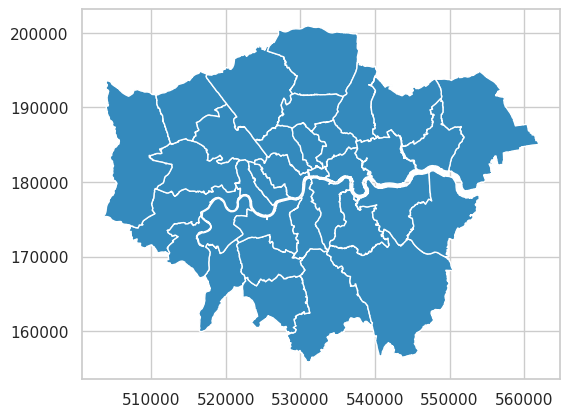

In [71]:
# Load the administrative boundary shapefile
gdf = gpd.read_file('Data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

# Plot the geographic boundaries
gdf.plot()

# Print information about the loaded geographic data
print(gdf.info())

In [72]:
# Load data from a CSV file with specified encoding and parse 'last_review' as dates
df = pd.read_csv('Data_clean/cleaned_data_12061010.csv', encoding="ISO-8859-1", parse_dates=['last_review'])
df.head()

# Create a GeoDataFrame with point geometries from longitude and latitude
gdf_points_filtered = gpd.GeoDataFrame(
    df[['price', 'minimum_nights', 'market_activity', 'year']],  # Select the desired columns
    geometry=gpd.points_from_xy(df.longitude, df.latitude),  # Create point geometries using longitude and latitude
    crs="EPSG:4326"  # Set the initial coordinate reference system to WGS 84 (EPSG:4326)
)
gdf_points_filtered.head()

,price,minimum_nights,market_activity,year,geometry
0,35.0,1,0.806531,2019,POINT (-0.37900 51.44473)
1,103.0,7,0.873340,2019,POINT (-0.21531 51.47398)
2,85.0,3,0.398113,2019,POINT (-0.16670 51.59118)
3,32.0,1,0.453986,2019,POINT (-0.27561 51.37960)
4,30.0,2,0.456846,2019,POINT (-0.39746 51.59863)


In [73]:
# Set the initial CRS for gdf_points_filtered to WGS 84 (EPSG:4326)
gdf_points_filtered.crs = "EPSG:4326"

# Attempt to reproject (convert) gdf_points_filtered to the CRS of gdf (neighborhoods)
gdf_points_filtered = gdf_points_filtered.to_crs(gdf.crs)

# Check the CRS after the transformation
print(gdf_points_filtered.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [74]:
# Perform a spatial join between gdf_points_filtered and gdf
# The 'within' operation checks if points are within polygon geometries
gdf_spatial_join = gpd.sjoin(gdf_points_filtered, gdf, how="inner", op='within')

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


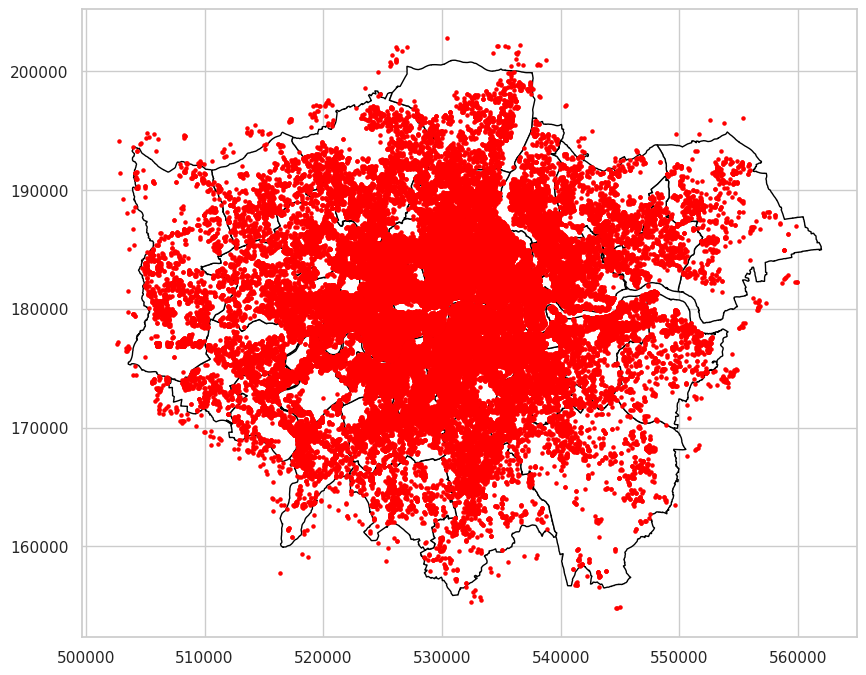

In [75]:
# Create a matplotlib figure and subplot with a specified size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the administrative boundary map (gdf) with white fill and black edges
gdf.plot(ax=ax, color='white', edgecolor='black')

# Plot the points from gdf_points_filtered in red with marker size 5
gdf_points_filtered.plot(ax=ax, color='red', markersize=5)

# Display the map
plt.show()

In [76]:
gdf_points_filtered.head()

,price,minimum_nights,market_activity,year,geometry
0,35.0,1,0.806531,2019,POINT (512750.672 172994.812)
1,103.0,7,0.873340,2019,POINT (524046.538 176511.933)
2,85.0,3,0.398113,2019,POINT (527095.760 189628.487)
3,32.0,1,0.453986,2019,POINT (520105.870 165916.158)
4,30.0,2,0.456846,2019,POINT (511093.063 190081.383)


In [77]:
# Create an empty DataFrame to store the results
gdf_neighborhoods_activity = pd.DataFrame()

# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Loop through each year
for year in years_of_interest:
    # Filter the data for the current year
    temp_df = gdf_spatial_join[gdf_spatial_join['year'] == year]
    
    # Calculate the average market activity for each neighborhood in the current year
    temp_avg_activity = temp_df.groupby('NAME')['market_activity'].mean().reset_index(name=f'avg_activity_{year}')
    
    # If it's the first year, assign the data directly
    if gdf_neighborhoods_activity.empty:
        gdf_neighborhoods_activity = temp_avg_activity
    else:
        # Otherwise, merge the data with the existing DataFrame using an outer join
        gdf_neighborhoods_activity = gdf_neighborhoods_activity.merge(temp_avg_activity, on='NAME', how='outer')

In [78]:
# Merge the average market activity data with the original neighborhood shapefile
gdf_neighborhoods = gdf.merge(gdf_neighborhoods_activity, on='NAME', how='left')

# Display the first few rows of the merged DataFrame
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_activity_2019,avg_activity_2020,avg_activity_2021,avg_activity_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.506546,0.562011,0.594467,0.572679
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",0.522611,0.592313,0.620903,0.637648
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",0.524221,0.596536,0.581957,0.619923
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",0.553314,0.584123,0.608841,0.633443
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",0.514520,0.608018,0.629662,0.573441


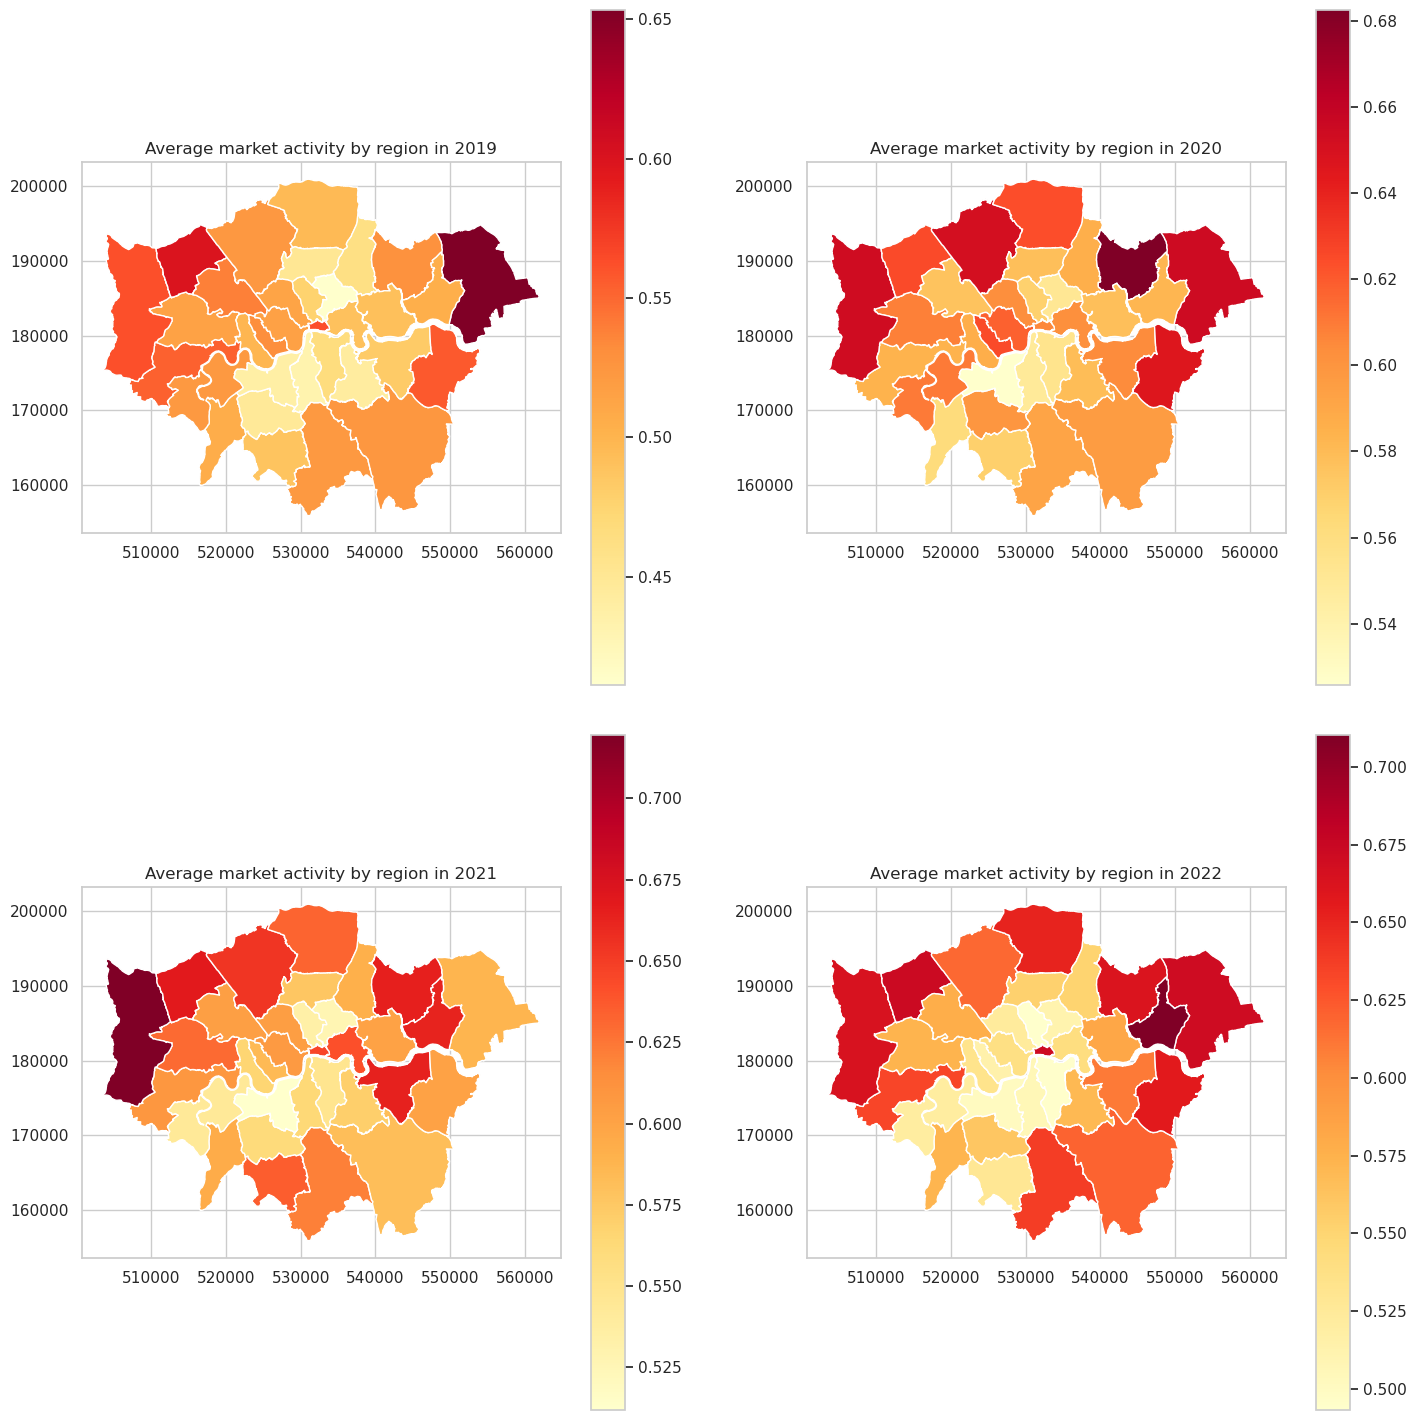

In [79]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot average market activity for 2019
avg_activity_2019 = gdf_neighborhoods.plot(column='avg_activity_2019', ax=axes[0, 0], legend=True,
                                            cmap='YlOrRd')
axes[0, 0].set_title('Average market activity by region in 2019')

# Plot average market activity for 2020
avg_activity_2020 = gdf_neighborhoods.plot(column='avg_activity_2020', ax=axes[0, 1], legend=True,
                                            cmap='YlOrRd')
axes[0, 1].set_title('Average market activity by region in 2020')

# Plot average market activity for 2021
avg_activity_2021 = gdf_neighborhoods.plot(column='avg_activity_2021', ax=axes[1, 0], legend=True,
                                            cmap='YlOrRd')
axes[1, 0].set_title('Average market activity by region in 2021')

# Plot average market activity for 2022
avg_activity_2022 = gdf_neighborhoods.plot(column='avg_activity_2022', ax=axes[1, 1], legend=True,
                                            cmap='YlOrRd')
axes[1, 1].set_title('Average market activity by region in 2022')

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)

In [80]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the data (Replace with your CSV file path)
data = pd.read_csv('Data_clean/cleaned_data_12061010.csv')

# Initialize the London map with an initial focus and zoom level
map_london = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Extract latitude, longitude, and price as the data source for the heatmap
heat_data = data[['latitude', 'longitude', 'price']].values.tolist()

# Generate the heatmap and adjust the color gradient for better contrast
HeatMap(
    heat_data,
    radius=10,
    max_zoom=13,
    gradient={
        0.01: 'grey',
        0.2: 'blue',
        0.4: 'lime',
        0.7: 'yellow',
        0.75: 'orange',
        0.85: 'red',
        0.89: 'black'
    },
    min_opacity=0.6
).add_to(map_london)

# Save the map to an HTML file
map_london.save('london_heatmap5.html')

In [81]:
# Select data for the years 2020 to 2022
df_filtered5 = df_filtered3[df_filtered3['year'].between(2020, 2022)]

# Reset the index to turn 'id' and 'year_copy' into normal columns
df_filtered5.reset_index(inplace=True)

# Create a copy of the 'id' column
df_filtered5['id_copy'] = df_filtered5['id']

# Set a new multi-level index using 'id' and 'year' columns
df_filtered5 = df_filtered5.set_index(["id", "year"])

/tmp/ipykernel_13964/698254497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered5['id_copy'] = df_filtered5['id']


In [82]:
df_filtered5.head()

,,year_copy,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,...,market_activity,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,log_price,id_copy
id,year,,,,,,,,,,,,,,,,,,,,,
11551,2020,2020,43039,2,Arty and Bright London Apartment in Zone 2,7,51.46225,97.0,279,192,-0.11732,...,0.896972,1,0,0,False,False,False,1,4.574711,11551
15400,2020,2020,60302,1,Bright Chelsea Apartment. Chelsea!,10,51.48796,75.0,150,89,-0.16898,...,0.468642,1,0,0,False,False,False,0,4.317488,15400
17506,2020,2020,67915,2,Boutique Chelsea/Fulham Double bed 5-star ensuite,3,51.47935,150.0,364,0,-0.19743,...,0.998479,1,0,0,False,True,False,0,5.010635,17506
25123,2020,2020,103583,3,Clean big Room in London (Room 1),10,51.57224,29.0,1,129,-0.20906,...,0.088145,1,0,0,False,True,False,0,3.367296,25123
36299,2020,2020,155938,1,Kew Gardens 3BR house in cul-de-sac,3,51.47934,195.0,317,79,-0.28066,...,0.920753,1,0,0,False,False,False,1,5.273000,36299


In [83]:
df_filtered5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77568 entries, (11551, 2020) to (554172169432589120, 2022)
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year_copy                       77568 non-null  int64         
 1   host_id                         77568 non-null  int64         
 2   calculated_host_listings_count  77568 non-null  int64         
 3   name                            77568 non-null  object        
 4   minimum_nights                  77568 non-null  int64         
 5   latitude                        77568 non-null  float64       
 6   price                           77568 non-null  float64       
 7   availability_365                77568 non-null  int64         
 8   number_of_reviews               77568 non-null  int64         
 9   longitude                       77568 non-null  float64       
 10  last_review                     77568

In [84]:
# Select columns
selected_columns = ['id', 'description']

# Read CSV files for different years of London listings data into DataFrames
data_2020 = pd.read_csv('Data/London-2020-11-listings.csv', low_memory=False) # Read data for November 2020
data_2021 = pd.read_csv('Data/London-2021-10-listings.csv', low_memory=False) # Read data for October 2021
data_2022 = pd.read_csv('Data/London-2022-09-10-listings.csv', low_memory=False) # Read data for September 2022

# Ensure that each dataset only contains these selected columns and create copies
data_2020_description = data_2020[selected_columns].copy()
data_2021_description = data_2021[selected_columns].copy()
data_2022_description = data_2022[selected_columns].copy()

# Add a 'year' column to each dataset
data_2020_description['year'] = 2020
data_2021_description['year'] = 2021
data_2022_description['year'] = 2022

# Concatenate datasets
new_all_data = pd.concat([data_2020_description, data_2021_description, data_2022_description])

# Set a new multi-level index using 'id' and 'year' columns
new_all_data = new_all_data.set_index(["id", "year"])

In [85]:
new_all_data.head()

,,description
id,year,
11551,2020,Unlike most rental apartments out there my fla...
13913,2020,My bright double bedroom with a large window h...
15400,2020,Lots of windows and light. St Luke's Gardens ...
17402,2020,You'll have a wonderful stay in this superb mo...
17506,2020,Enjoy a chic stay in this elegant but fully mo...


In [86]:
df_filtered5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77568 entries, (11551, 2020) to (554172169432589120, 2022)
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year_copy                       77568 non-null  int64         
 1   host_id                         77568 non-null  int64         
 2   calculated_host_listings_count  77568 non-null  int64         
 3   name                            77568 non-null  object        
 4   minimum_nights                  77568 non-null  int64         
 5   latitude                        77568 non-null  float64       
 6   price                           77568 non-null  float64       
 7   availability_365                77568 non-null  int64         
 8   number_of_reviews               77568 non-null  int64         
 9   longitude                       77568 non-null  float64       
 10  last_review                     77568

In [87]:
new_all_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 216952 entries, (11551, 2020) to (554172169432589107, 2022)
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  209481 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [88]:
# Left merge the data, adding the 'description' column to the data
merged_df = df_filtered5.merge(new_all_data, left_index=True, right_index=True, how='left')

In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77568 entries, (11551, 2020) to (554172169432589120, 2022)
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year_copy                       77568 non-null  int64         
 1   host_id                         77568 non-null  int64         
 2   calculated_host_listings_count  77568 non-null  int64         
 3   name                            77568 non-null  object        
 4   minimum_nights                  77568 non-null  int64         
 5   latitude                        77568 non-null  float64       
 6   price                           77568 non-null  float64       
 7   availability_365                77568 non-null  int64         
 8   number_of_reviews               77568 non-null  int64         
 9   longitude                       77568 non-null  float64       
 10  last_review                     77568

In [90]:
# Retain rows where the 'description' column is not empty
merged_filtered = merged_df[merged_df['description'].notna()]

# Check the information of the filtered DataFrame
merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 61644 entries, (11551, 2020) to (49698549, 2022)
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year_copy                       61644 non-null  int64         
 1   host_id                         61644 non-null  int64         
 2   calculated_host_listings_count  61644 non-null  int64         
 3   name                            61644 non-null  object        
 4   minimum_nights                  61644 non-null  int64         
 5   latitude                        61644 non-null  float64       
 6   price                           61644 non-null  float64       
 7   availability_365                61644 non-null  int64         
 8   number_of_reviews               61644 non-null  int64         
 9   longitude                       61644 non-null  float64       
 10  last_review                     61644 non-null 

In [91]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Rejoin as a string
    return ' '.join(words)

# Clean the descriptions
merged_filtered['description'] = merged_filtered['description'].astype(str).apply(clean_text)

# Check the cleaned text
merged_filtered.head()

/tmp/ipykernel_13964/234972100.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered['description'] = merged_filtered['description'].astype(str).apply(clean_text)


,,year_copy,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,...,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,log_price,id_copy,description
id,year,,,,,,,,,,,,,,,,,,,,,
11551,2020,2020,43039,2,Arty and Bright London Apartment in Zone 2,7,51.46225,97.0,279,192,-0.11732,...,1,0,0,False,False,False,1,4.574711,11551,unlike rental apartment flat give straight awa...
15400,2020,2020,60302,1,Bright Chelsea Apartment. Chelsea!,10,51.48796,75.0,150,89,-0.16898,...,1,0,0,False,False,False,0,4.317488,15400,lot window light st luke garden end block rive...
17506,2020,2020,67915,2,Boutique Chelsea/Fulham Double bed 5-star ensuite,3,51.47935,150.0,364,0,-0.19743,...,1,0,0,False,True,False,0,5.010635,17506,enjoy chic stay elegant fully modernised victo...
25123,2020,2020,103583,3,Clean big Room in London (Room 1),10,51.57224,29.0,1,129,-0.20906,...,1,0,0,False,True,False,0,3.367296,25123,big room double bed clean sheet clean towel cl...
36299,2020,2020,155938,1,Kew Gardens 3BR house in cul-de-sac,3,51.47934,195.0,317,79,-0.28066,...,1,0,0,False,False,False,1,5.273000,36299,bed house garden close thames river min walk p...


In [92]:
# Use the str.contains method to check if 'description' contains keywords
# Use case=False to make the match case-insensitive
mask = merged_filtered['description'].str.contains('covid|quarantine|office', na=False, case=False)

# Filter rows that contain these keywords
filtered_rows = merged_filtered[mask]

# Display the results
filtered_rows.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2770 entries, (73431, 2020) to (42111241, 2022)
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year_copy                       2770 non-null   int64         
 1   host_id                         2770 non-null   int64         
 2   calculated_host_listings_count  2770 non-null   int64         
 3   name                            2770 non-null   object        
 4   minimum_nights                  2770 non-null   int64         
 5   latitude                        2770 non-null   float64       
 6   price                           2770 non-null   float64       
 7   availability_365                2770 non-null   int64         
 8   number_of_reviews               2770 non-null   int64         
 9   longitude                       2770 non-null   float64       
 10  last_review                     2770 non-null   

In [93]:
# Use the str.contains method to check if 'description' contains keywords
# Use case=False to make the match case-insensitive

# Check for 'covid' in 'description'
mask1 = merged_filtered['description'].str.contains('covid', na=False, case=False)

# Check for 'quarantine' in 'description'
mask2 = merged_filtered['description'].str.contains('quarantine', na=False, case=False)

# Check for 'office' in 'description'
mask3 = merged_filtered['description'].str.contains('office', na=False, case=False)

# Filter rows that contain these keywords
filtered_rows1 = merged_filtered[mask1]
filtered_rows2 = merged_filtered[mask2]
filtered_rows3 = merged_filtered[mask3]

# Display results for 'covid'
filtered_rows1.info()

# Display results for 'quarantine'
filtered_rows2.info()

# Display results for 'office'
filtered_rows3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1486 entries, (142117, 2020) to (8098943, 2022)
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year_copy                       1486 non-null   int64         
 1   host_id                         1486 non-null   int64         
 2   calculated_host_listings_count  1486 non-null   int64         
 3   name                            1486 non-null   object        
 4   minimum_nights                  1486 non-null   int64         
 5   latitude                        1486 non-null   float64       
 6   price                           1486 non-null   float64       
 7   availability_365                1486 non-null   int64         
 8   number_of_reviews               1486 non-null   int64         
 9   longitude                       1486 non-null   float64       
 10  last_review                     1486 non-null   

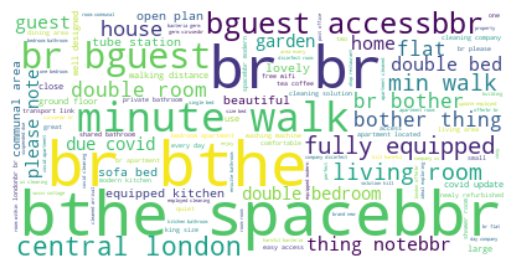

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Merge the descriptions into a long string
text = " ".join(description for description in filtered_rows['description'])

# Generate a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
# Create the "Data_clean" folder if it doesn't exist
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Export the DataFrame to a CSV file
output_file = os.path.join(data_folder, "description.csv")
filtered_rows.to_csv(output_file, index=False)

In [96]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install mgwr

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install mgwr --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: mgwr
    Found existing installation: mgwr 2.1.2
    Uninstalling mgwr-2.1.2:
      Successfully uninstalled mgwr-2.1.2
Note: you may need to restart the kernel to use updated packages.


In [101]:
pip install libpysal --upgrade

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install esda --upgrade

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install splot --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [105]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps
import esda
import matplotlib.pyplot as plt

In [106]:
from matplotlib.lines import Line2D

In [107]:
df = pd.read_csv("Data_clean/cleaned_data_12061010.csv", encoding="ISO-8859-1",parse_dates=['last_review'])

In [108]:
df.head()

,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,last_review,...,reviews_per_month_normalized,market_activity,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,log_price
0,49602995,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,35.0,278,47,-0.37900,2019-11-06,...,0.014943,0.806531,0,1,0,False,True,False,0,3.555348
1,25587547,1,Stunning Central London Apartment Close The River,7,51.47398,103.0,317,8,-0.21531,2019-11-06,...,0.000000,0.873340,0,1,0,False,False,False,0,4.634729
2,228095684,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,85.0,139,16,-0.16670,2019-11-06,...,0.008575,0.398113,0,1,0,False,False,False,0,4.442651
3,234271729,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,32.0,140,50,-0.27561,2019-11-06,...,0.039565,0.453986,0,1,0,False,True,False,0,3.465736
4,246523174,2,room in the cottage,2,51.59863,30.0,157,15,-0.39746,2019-11-06,...,0.018509,0.456846,0,1,0,False,True,False,0,3.401197


In [109]:
gdf_points_filtered = gpd.GeoDataFrame(
    df[['price', 'minimum_nights','market_activity','year']],  # Contains the required columns
    geometry=gpd.points_from_xy(df.longitude, df.latitude),  # Creating Point Geometry Using Longitude and Latitude
    crs="EPSG:4326"  # Set the initial coordinate reference system to WGS 84.
)
gdf_points_filtered.head()

,price,minimum_nights,market_activity,year,geometry
0,35.0,1,0.806531,2019,POINT (-0.37900 51.44473)
1,103.0,7,0.873340,2019,POINT (-0.21531 51.47398)
2,85.0,3,0.398113,2019,POINT (-0.16670 51.59118)
3,32.0,1,0.453986,2019,POINT (-0.27561 51.37960)
4,30.0,2,0.456846,2019,POINT (-0.39746 51.59863)


In [111]:
gdf_neighborhoods = gpd.read_file('Data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   SUB_2009    0 non-null      object  
 6   SUB_2006    0 non-null      object  
 7   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 2.2+ KB
None


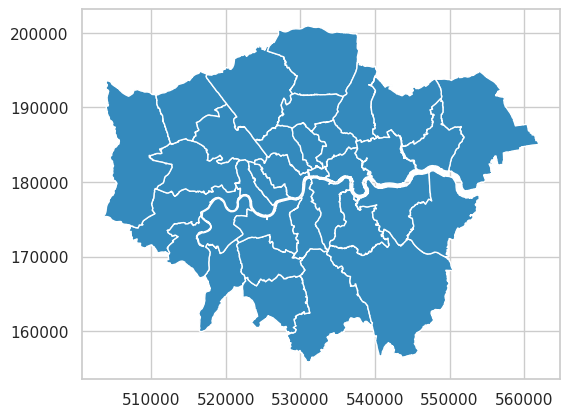

In [112]:
gdf_neighborhoods.plot()
print(gdf_neighborhoods.info())

In [113]:
# Determine the initial CRS for gdf_points, usually WGS 84
gdf_points_filtered.crs = "EPSG:4326"

# Trying to convert CRS again to gdf_neighborhoods' CRS
gdf_points_filtered = gdf_points_filtered.to_crs(gdf_neighborhoods.crs)

# Check the converted CRS
print(gdf_points_filtered.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


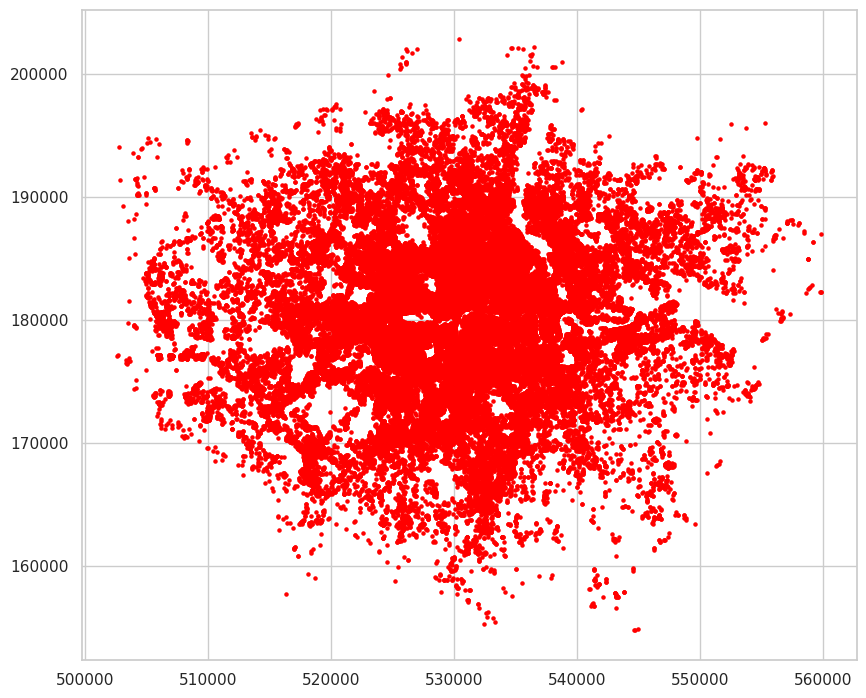

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_points_filtered.plot(ax=ax, color='red', markersize=5)
plt.show()

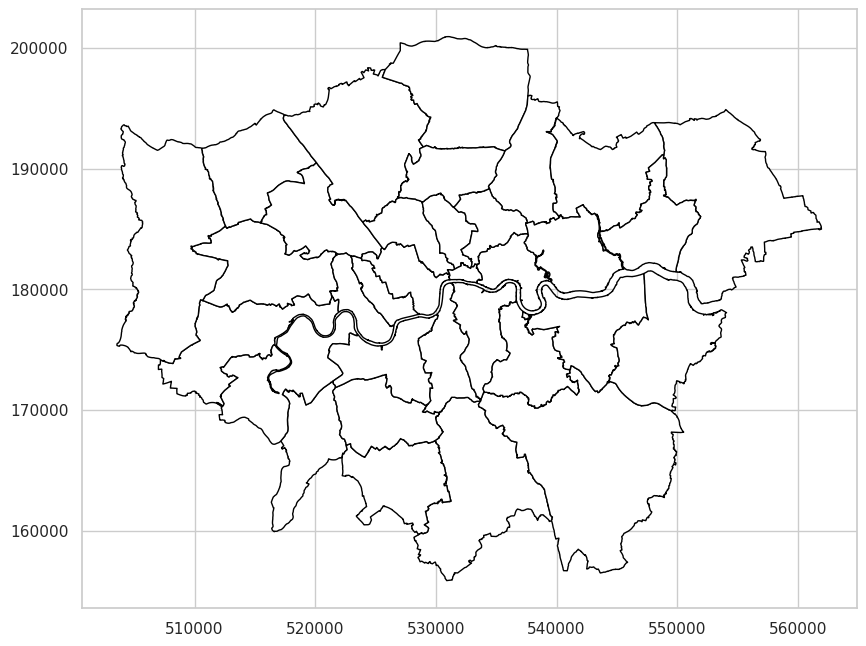

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_neighborhoods.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [116]:
print(gdf_points_filtered.crs)
print(gdf_neighborhoods.crs)
# If the CRSs don't match, they need to be set to the same CRS
# For example, if gdf_neighborhoods has the correct CRS, then gdf_points could be set to the same CRS
# gdf_points.set_crs(gdf_neighborhoods.crs, inplace=True)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_n

In [117]:
gdf_points_filtered.head()

,price,minimum_nights,market_activity,year,geometry
0,35.0,1,0.806531,2019,POINT (512750.672 172994.812)
1,103.0,7,0.873340,2019,POINT (524046.538 176511.933)
2,85.0,3,0.398113,2019,POINT (527095.760 189628.487)
3,32.0,1,0.453986,2019,POINT (520105.870 165916.158)
4,30.0,2,0.456846,2019,POINT (511093.063 190081.383)


In [118]:
print(gdf_points_filtered.describe())

               price  minimum_nights  market_activity           year
count  149746.000000   149746.000000    149746.000000  149746.000000
mean      135.208929        5.615649         0.547011    2021.152605
std       113.817788       25.850138         0.348634       1.506398
min        22.000000        1.000000         0.000651    2019.000000
25%        58.000000        1.000000         0.226501    2020.000000
50%       100.000000        2.000000         0.494876    2021.000000
75%       171.000000        3.000000         0.917607    2023.000000
max       795.000000     1125.000000         2.270491    2023.000000


In [119]:
gdf_spatial_join = gpd.sjoin(gdf_points_filtered, gdf_neighborhoods, how="inner", op='within')

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [120]:
gdf_spatial_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 149208 entries, 0 to 149738
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   price            149208 non-null  float64 
 1   minimum_nights   149208 non-null  int64   
 2   market_activity  149208 non-null  float64 
 3   year             149208 non-null  int64   
 4   geometry         149208 non-null  geometry
 5   index_right      149208 non-null  int64   
 6   NAME             149208 non-null  object  
 7   GSS_CODE         149208 non-null  object  
 8   HECTARES         149208 non-null  float64 
 9   NONLD_AREA       149208 non-null  float64 
 10  ONS_INNER        149208 non-null  object  
 11  SUB_2009         0 non-null       object  
 12  SUB_2006         0 non-null       object  
dtypes: float64(4), geometry(1), int64(3), object(5)
memory usage: 15.9+ MB


In [121]:
#Calculate the average price of each neighborhood in 2020, 2021, and 2022
# Create an empty DataFrame to store the results
gdf_neighborhoods_price = pd.DataFrame()
years_of_interest = [2019,2020,2021,2022]
for year in years_of_interest:
    # Calculate average price for each year
    temp_df = gdf_spatial_join[gdf_spatial_join['year'] == year]
    temp_avg_price = temp_df.groupby('NAME')['price'].mean().reset_index(name=f'avg_price_{year}')
    # If it is the first year, direct assignment
    if gdf_neighborhoods_price.empty:
        gdf_neighborhoods_price = temp_avg_price
    else:
        # Otherwise, merge into an existing DataFrame
        gdf_neighborhoods_price = gdf_neighborhoods_price.merge(temp_avg_price, on='NAME', how='outer')

In [122]:
gdf_neighborhoods_price.head()

,NAME,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022
0,Barking and Dagenham,63.278261,68.602210,84.017341,105.819905
1,Barnet,69.404494,81.934189,98.240848,131.580229
2,Bexley,60.200000,70.968504,74.247934,91.258242
3,Brent,75.684817,92.306684,105.437408,125.479953
4,Bromley,57.014085,70.717593,86.820513,109.026415


In [123]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [124]:
# Assign the average price for each year to the corresponding neighborhood in the SHP file.
# First, delete the old price column in gdf_neighborhoods
columns_to_drop = ['avg_price_2019', 'avg_price_2020', 'avg_price_2021', 'avg_price_2022']
gdf_neighborhoods = gdf_neighborhoods.drop(columns=columns_to_drop, errors='ignore')

# merge the new price data
gdf_neighborhoods = gdf_neighborhoods.merge(gdf_neighborhoods_price, on='NAME', how='left')


In [125]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",68.100529,69.994872,88.131707,115.000000
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",57.236074,57.172786,69.592857,90.643863
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",57.014085,70.717593,86.820513,109.026415
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",76.819718,81.838462,93.418605,120.410550
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",72.590982,74.748700,83.523894,112.920000


In [126]:
gdf_points_min_nights = gdf_points_filtered[gdf_points_filtered['minimum_nights'] >= 14]

In [127]:
gdf_points_min_nights.head()

,price,minimum_nights,market_activity,year,geometry
642,100.0,180,1.079273,2019,POINT (525992.701 179045.557)
771,82.0,91,0.953221,2019,POINT (524884.008 182811.462)
910,65.0,31,0.108259,2019,POINT (539234.754 178311.444)
1016,113.0,91,0.302246,2019,POINT (530048.194 182577.188)
1027,65.0,21,0.699798,2019,POINT (537313.950 176887.113)


In [128]:
years_of_interest = [2019,2020,2021,2022]
for year in years_of_interest:
    # Filtering out data for specific years
    yearly_data = gdf_points_min_nights[gdf_points_min_nights['year'] == year]

    # Use spatial connectivity to match these points to the corresponding boroughs
    joined_data = gpd.sjoin(yearly_data, gdf_neighborhoods, how="inner", predicate='within')

    # Calculation of the number of points per administrative district
    count_per_neighborhood = joined_data.groupby('NAME').size().reset_index(name=f'min_nights_count_{year}')

    # Merge statistics to gdf_neighborhoods
    if f'min_nights_count_{year}' in gdf_neighborhoods.columns:
        gdf_neighborhoods.drop(columns=[f'min_nights_count_{year}'], inplace=True)
    gdf_neighborhoods = gdf_neighborhoods.merge(count_per_neighborhood, on='NAME', how='left')

In [129]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022,min_nights_count_2019,min_nights_count_2020,min_nights_count_2021,min_nights_count_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",68.100529,69.994872,88.131707,115.000000,4.0,6,8,12
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",57.236074,57.172786,69.592857,90.643863,5.0,21,19,23
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",57.014085,70.717593,86.820513,109.026415,1.0,6,7,11
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",76.819718,81.838462,93.418605,120.410550,5.0,21,28,18
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",72.590982,74.748700,83.523894,112.920000,7.0,35,56,37


In [130]:
print(gdf_neighborhoods['min_nights_count_2022'])

0      12
1      23
2      11
3      18
4      37
5       4
6      17
7      22
8      54
9      50
10     82
11    105
12     42
13     42
14      6
15     14
16     33
17     21
18      4
19     16
20     25
21     89
22     80
23    138
24    321
25    144
26    212
27     76
28    123
29     41
30     53
31     14
32     10
Name: min_nights_count_2022, dtype: int64


In [131]:
# Calculate the rate of price change and add to gdf_neighborhoods
gdf_neighborhoods['price_change_2019_2020'] = ((gdf_neighborhoods['avg_price_2020'] - gdf_neighborhoods['avg_price_2019']) / gdf_neighborhoods['avg_price_2019']) * 100
gdf_neighborhoods['price_change_2020_2021'] = ((gdf_neighborhoods['avg_price_2021'] - gdf_neighborhoods['avg_price_2020']) / gdf_neighborhoods['avg_price_2020']) * 100
gdf_neighborhoods['price_change_2021_2022'] = ((gdf_neighborhoods['avg_price_2022'] - gdf_neighborhoods['avg_price_2021']) / gdf_neighborhoods['avg_price_2021']) * 100

In [132]:
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NAME                    33 non-null     object  
 1   GSS_CODE                33 non-null     object  
 2   HECTARES                33 non-null     float64 
 3   NONLD_AREA              33 non-null     float64 
 4   ONS_INNER               33 non-null     object  
 5   SUB_2009                0 non-null      object  
 6   SUB_2006                0 non-null      object  
 7   geometry                33 non-null     geometry
 8   avg_price_2019          33 non-null     float64 
 9   avg_price_2020          33 non-null     float64 
 10  avg_price_2021          33 non-null     float64 
 11  avg_price_2022          33 non-null     float64 
 12  min_nights_count_2019   31 non-null     float64 
 13  min_nights_count_2020   33 non-null     int64   
 14  min_nights_count_202

In [133]:
df1 = pd.read_csv("Data_clean/description.csv", encoding="ISO-8859-1")

In [134]:
df1.head()

,year_copy,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,...,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,log_price,id_copy,description
0,2020,383525,1,Two bedroom luxury Flat in Brixton with city v...,3,51.46193,85.0,10,65,-0.11085,...,1,0,0,False,False,False,1,4.442651,73431,apartment top floor portered building apartmen...
1,2020,466353,1,Maisonette in Central London Zone 1,2,51.48968,58.0,365,415,-0.11637,...,1,0,0,False,True,False,0,4.060443,85191,bthe spacebbr room single bed nice spacious ma...
2,2020,510439,1,North Kensington Ã¢ÂÂ Balcony Room,2,51.52099,49.0,354,297,-0.22852,...,1,0,0,False,True,False,1,3.891820,97178,cosy double bedroom private shower room victor...
3,2020,192627,1,"Stylish & Bright, 1 Bed, Shoreditch",3,51.52902,140.0,363,84,-0.08944,...,1,0,0,False,False,False,0,4.941642,142117,newly decorated stylish apartment quiet area t...
4,2020,497366,2,MODERN Self-Contained ARCHITECT FLAT,1,51.55083,65.0,338,30,-0.08425,...,1,0,0,False,False,False,1,4.174387,190028,undertaking precaution necessary ensure non sp...


In [135]:
gdf_points_des = gpd.GeoDataFrame(
    df1[['description','year_copy']],  
    geometry=gpd.points_from_xy(df1.longitude, df1.latitude),# Create point geometry using longitude and latitude
    crs="EPSG:4326"  # Set initial coordinate reference system to WGS 84
)
gdf_points_des.head()

,description,year_copy,geometry
0,apartment top floor portered building apartmen...,2020,POINT (-0.11085 51.46193)
1,bthe spacebbr room single bed nice spacious ma...,2020,POINT (-0.11637 51.48968)
2,cosy double bedroom private shower room victor...,2020,POINT (-0.22852 51.52099)
3,newly decorated stylish apartment quiet area t...,2020,POINT (-0.08944 51.52902)
4,undertaking precaution necessary ensure non sp...,2020,POINT (-0.08425 51.55083)


In [136]:
# # 确定 gdf_points 的初始 CRS
gdf_points_des.crs = "EPSG:4326"

# Trying to convert CRS again to gdf_neighborhoods' CRS
gdf_points_des = gdf_points_des.to_crs(gdf_neighborhoods.crs)

# Check the converted CRS
print(gdf_points_filtered.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [137]:
gdf_points_des.head()

,description,year_copy,geometry
0,apartment top floor portered building apartmen...,2020,POINT (531335.471 175353.929)
1,bthe spacebbr room single bed nice spacious ma...,2020,POINT (530872.642 178429.927)
2,cosy double bedroom private shower room victor...,2020,POINT (523002.635 181717.387)
3,newly decorated stylish apartment quiet area t...,2020,POINT (532627.970 182853.098)
4,undertaking precaution necessary ensure non sp...,2020,POINT (532924.444 185287.856)


In [138]:
years_of_interest = [2020,2021,2022]
for year_copy in years_of_interest:
    # Filtering out data for specific years
    yearly_data = gdf_points_des[gdf_points_des['year_copy'] == year_copy]

    # Use spatial connectivity to match these points to the corresponding boroughs
    joined_data = gpd.sjoin(yearly_data, gdf_neighborhoods, how="inner", predicate='within')

    # Calculation of the number of points per administrative district
    count_per_neighborhood = joined_data.groupby('NAME').size().reset_index(name=f'host_action_{year_copy}')

    # Merge statistics to gdf_neighborhoods
    if f'host_action_{year_copy}' in gdf_neighborhoods.columns:
        gdf_neighborhoods.drop(columns=[f'host_action_{year_copy}'], inplace=True)
    gdf_neighborhoods = gdf_neighborhoods.merge(count_per_neighborhood, on='NAME', how='left')

In [139]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_price_2019,avg_price_2020,...,min_nights_count_2019,min_nights_count_2020,min_nights_count_2021,min_nights_count_2022,price_change_2019_2020,price_change_2020_2021,price_change_2021_2022,host_action_2020,host_action_2021,host_action_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",68.100529,69.994872,...,4.0,6,8,12,2.781686,25.911663,30.486522,8,12,10.0
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",57.236074,57.172786,...,5.0,21,19,23,-0.110574,21.723746,30.248803,21,17,11.0
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",57.014085,70.717593,...,1.0,6,7,11,24.035303,22.770742,25.576792,12,7,9.0
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",76.819718,81.838462,...,5.0,21,28,18,6.533145,14.150001,28.893544,34,33,25.0
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",72.590982,74.748700,...,7.0,35,56,37,2.972432,11.739594,35.194846,16,21,14.0


Global Moran's Index 2019: I = 0.5051141667819284, p-value = 0.002
Global Moran's Index 2020: I = 0.49067363719061347, p-value = 0.001
Global Moran's Index 2021: I = 0.4758183942600327, p-value = 0.001
Global Moran's Index 2022: I = 0.4888160185087678, p-value = 0.001


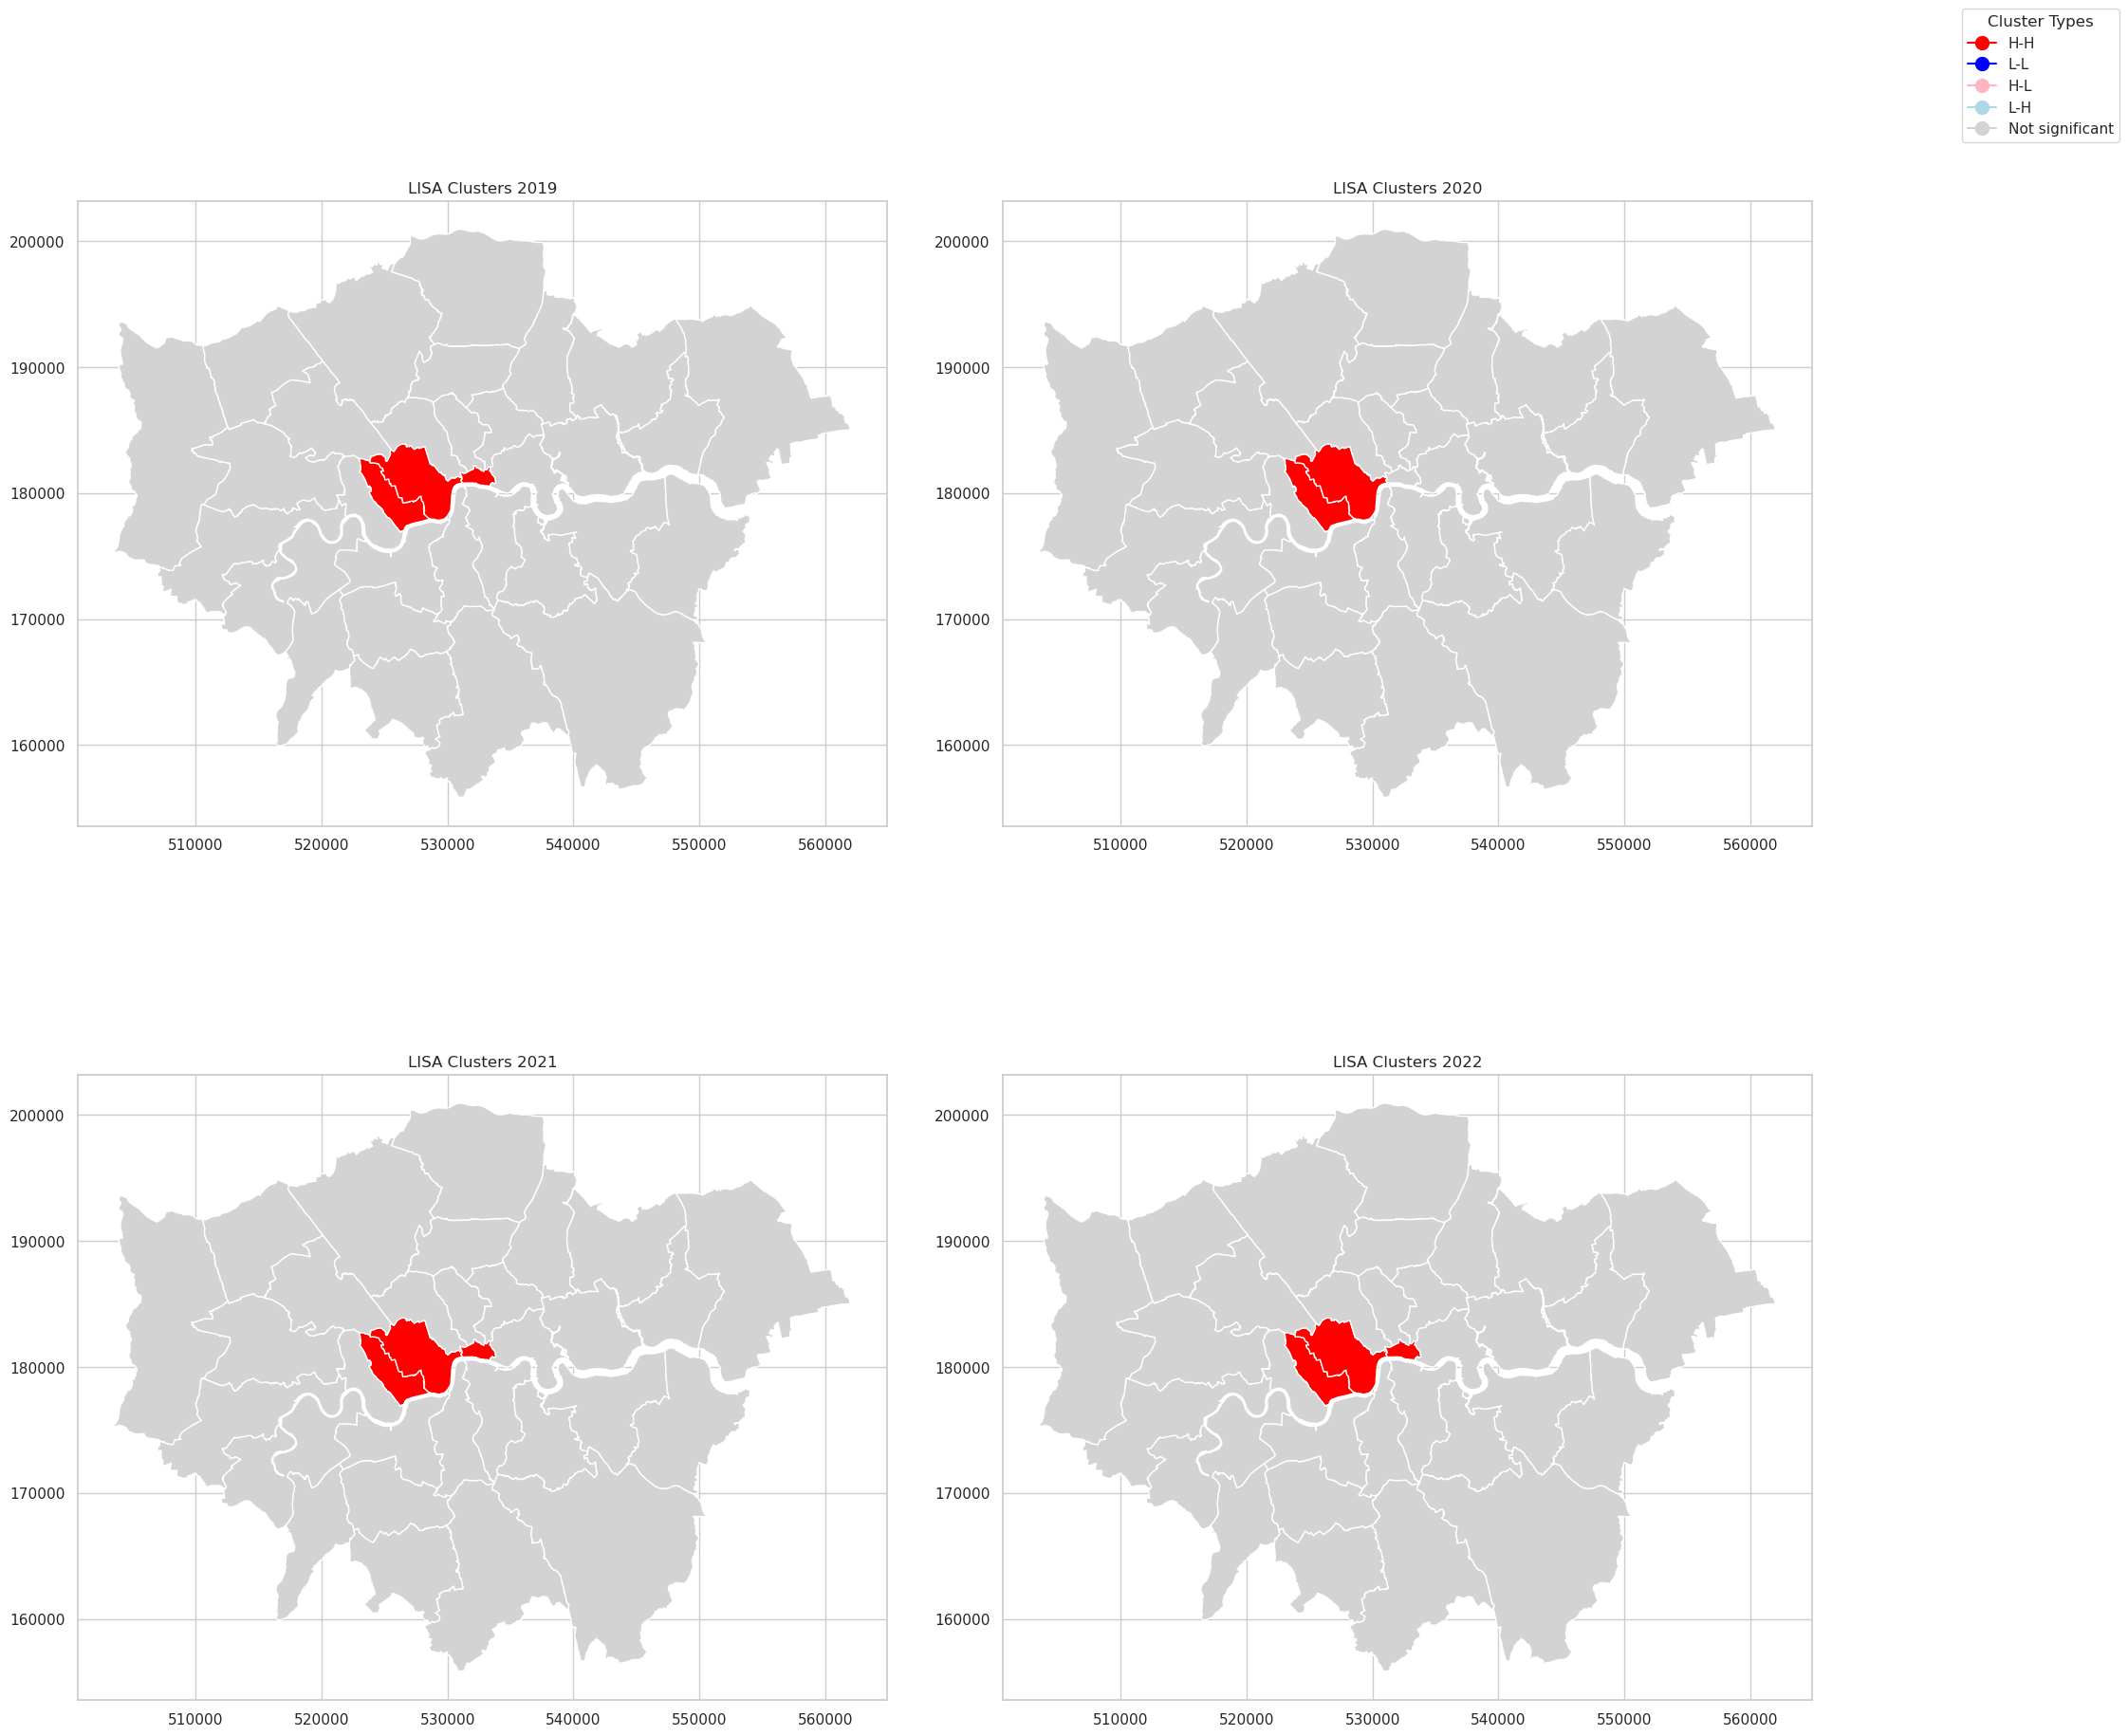

In [140]:
import esda
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import libpysal as lps
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx  

# Assume gdf_neighborhoods is your GeoDataFrame
# Keep the rest of the code the same

# Setting the subgraph layout
fig, axs = plt.subplots(2, 2, figsize=(20, 20))  # 2 行 2 列

# Calculate the weighting matrix
w = lps.weights.Queen.from_dataframe(gdf_neighborhoods, use_index=True)
w.transform = 'r'

# Define a list of column name prefixes
years = ['2019', '2020', '2021', '2022']
avg_price_columns = [f'avg_price_{year}' for year in years]

# Calculate and print the global Moran index
for i, year in enumerate(years):  # Use enumerate to get both the index and the value at the same time.
    column = avg_price_columns[i]  # Getting the correct column name
    y = gdf_neighborhoods[column].values  # Use the correct column values
    moran_global = esda.Moran(y, w)
    print(f"Global Moran's Index {year}: I = {moran_global.I}, p-value = {moran_global.p_sim}")

# Creating custom legend labels
legend_labels = {
    1: 'High-High (H-H)',
    2: 'Low-Low (L-L)',
    3: 'Low-High (L-H)',
    4: 'High-Low (H-L)'
}

# Define the LISA category discriminant function
def lisa_classification(moran_loc):
    categories = []
    for z, i in zip(moran_loc.z, moran_loc.Is):
        if z > 1.96 and i > 0:
            categories.append("H-H")
        elif z > 1.96 and i < 0:
            categories.append("L-L")
        elif z < -1.96 and i > 0:
            categories.append("H-L")
        elif z < -1.96 and i < 0:
            categories.append("L-H")
        else:
            categories.append("Not significant")
    return categories

# Creating a colour map
color_map = {
    "H-H": "red",
    "L-L": "blue",
    "H-L": "lightpink",
    "L-H": "lightblue",
    "Not significant": "lightgrey"
}

# Mapping the LISA Cluster
for i, year in enumerate(years):
    y = gdf_neighborhoods[avg_price_columns[i]].values
    moran_loc = esda.Moran_Local(y, w)
    
    # Applying the LISA category discrimination rules
    gdf_neighborhoods[f'lisa_category_{year}'] = lisa_classification(moran_loc)
    
    # Select the current subgraph
    ax = axs[i // 2, i % 2]
    
   # map
    for category, color in color_map.items():
        # Check if the filtered GeoDataFrame is empty
        to_plot = gdf_neighborhoods[gdf_neighborhoods[f'lisa_category_{year}'] == category]
        if not to_plot.empty:
            to_plot.plot(ax=ax, color=color, label=category)
        ax.set_title(f'LISA Clusters {year}')
        ax.axis('on')

# Creating a Legend Handle
legend_handles = [Line2D([0], [0], marker='o', color=color, label=label, markersize=10)
                  for label, color in color_map.items()]

# Add Legend
fig.legend(handles=legend_handles, title='Cluster Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=3.0)
plt.show()

In [141]:
print(gdf_neighborhoods.geometry.type)

0          Polygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13    MultiPolygon
14         Polygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28         Polygon
29         Polygon
30    MultiPolygon
31    MultiPolygon
32         Polygon
dtype: object


In [142]:
# Replace missing values in columns 'host_action_2022' and 'min_nights_count_2019' with 0
gdf_neighborhoods['host_action_2022'].fillna(0, inplace=True)
gdf_neighborhoods['min_nights_count_2019'].fillna(0, inplace=True)

In [143]:
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NAME                    33 non-null     object  
 1   GSS_CODE                33 non-null     object  
 2   HECTARES                33 non-null     float64 
 3   NONLD_AREA              33 non-null     float64 
 4   ONS_INNER               33 non-null     object  
 5   SUB_2009                0 non-null      object  
 6   SUB_2006                0 non-null      object  
 7   geometry                33 non-null     geometry
 8   avg_price_2019          33 non-null     float64 
 9   avg_price_2020          33 non-null     float64 
 10  avg_price_2021          33 non-null     float64 
 11  avg_price_2022          33 non-null     float64 
 12  min_nights_count_2019   33 non-null     float64 
 13  min_nights_count_2020   33 non-null     int64   
 14  min_nights_count_202

In [144]:
def fit_gwr_and_update_df(df, independent_var, dependent_var):
    # Extraction of independent and dependent variables
    X = df[[independent_var]].values
    Y = df[[dependent_var]].values

    # Add constant term (intercept)
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Extract coordinates
    df['centroid'] = df.geometry.centroid

    # Extract the x and y coordinates of the centre of mass
    u = df['centroid'].x
    v = df['centroid'].y

    coords = list(zip(u, v))

    # Select Bandwidth
    bw = min(33, df.shape[0] // 2)

    # Fitting the GWR model
    model = GWR(coords, Y, X, bw, kernel='gaussian', fixed=False).fit()

    # Get local R² values and coefficients
    local_R2 = model.localR2
    local_params = model.params[:, 1]

    # Updating the data frame
    df[f'local_R2_{independent_var}_vs_{dependent_var}'] = local_R2
    df[f'local_params_{independent_var}_vs_{dependent_var}'] = local_params

    return df

# Use this function
combinations = []
years = range(2019, 2023)

for year in years:
    combinations.append((f'avg_price_{year}', f'min_nights_count_{year}'))
    # Add host_action combinations only for 2020 and beyond
    if year > 2019:
        combinations.append((f'avg_price_{year}', f'host_action_{year}'))

# Loop over all combinations and update gdf_neighborhoods
for independent_var, dependent_var in combinations:
    gdf_neighborhoods = fit_gwr_and_update_df(gdf_neighborhoods, independent_var, dependent_var)


In [145]:
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   NAME                                                  33 non-null     object  
 1   GSS_CODE                                              33 non-null     object  
 2   HECTARES                                              33 non-null     float64 
 3   NONLD_AREA                                            33 non-null     float64 
 4   ONS_INNER                                             33 non-null     object  
 5   SUB_2009                                              0 non-null      object  
 6   SUB_2006                                              0 non-null      object  
 7   geometry                                              33 non-null     geometry
 8   avg_price_2019                              

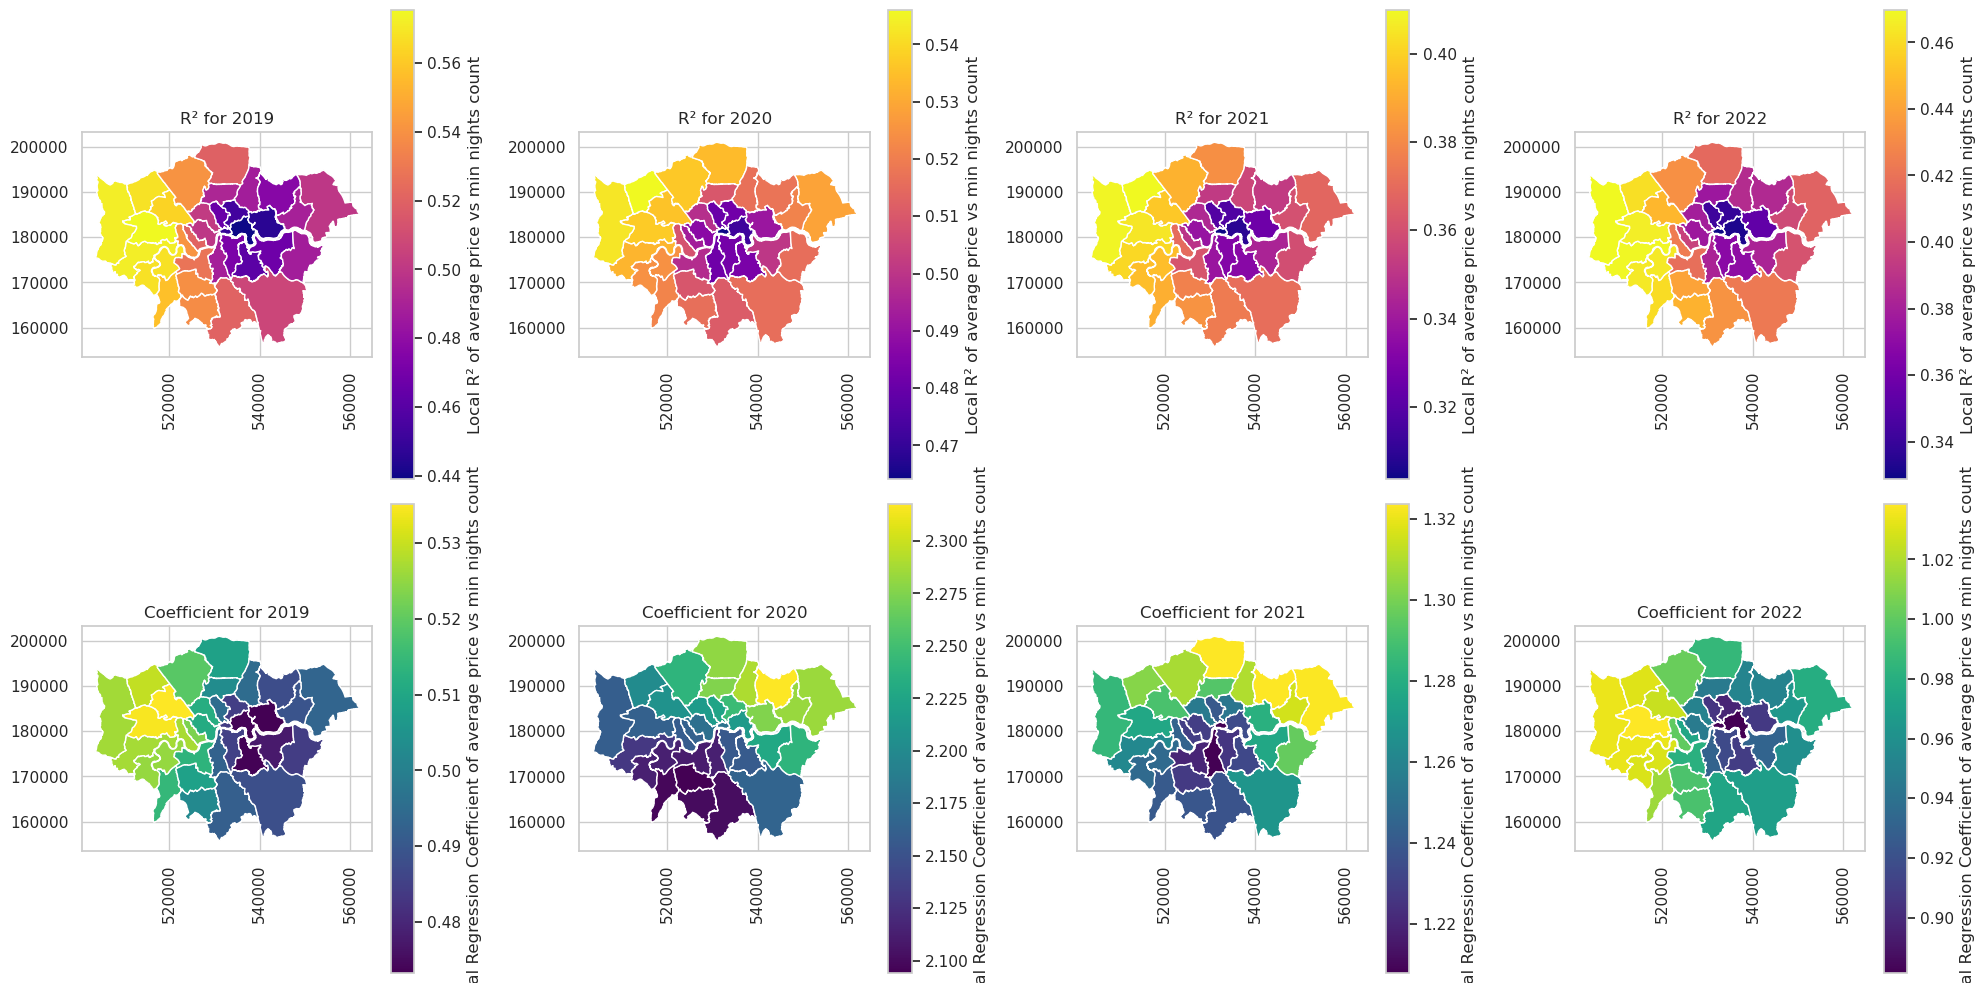

In [146]:
# Setting up the subgraph layout
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows 4 columns

# Define a list of column name prefixes
years = ['2019', '2020', '2021', '2022']
r2_columns = [f'local_R2_avg_price_{year}_vs_min_nights_count_{year}' for year in years]
param_columns = [f'local_params_avg_price_{year}_vs_min_nights_count_{year}' for year in years]

# R² mapped for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=r2_columns[i], ax=axs[0, i], legend=True,
                           legend_kwds={'label': "Local R² of average price vs min nights count"},
                           cmap='plasma')  # Using viridis colour mapping
    axs[0, i].set_title(f'R² for {year}')
    axs[0, i].axis('on') 
    axs[0, i].tick_params(axis='x', labelrotation=90)




# Mapping of coefficients for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=param_columns[i], ax=axs[1, i], legend=True,
                           legend_kwds={'label': "Local Regression Coefficient of average price vs min nights count"},
                           cmap='viridis')  # Using viridis colour mapping
    axs[1, i].set_title(f'Coefficient for {year}')
    axs[0, i].axis('on')  
    axs[1, i].tick_params(axis='x', labelrotation=90)

# Adjust subgraph spacing
plt.tight_layout()

# Display graphics
plt.show()

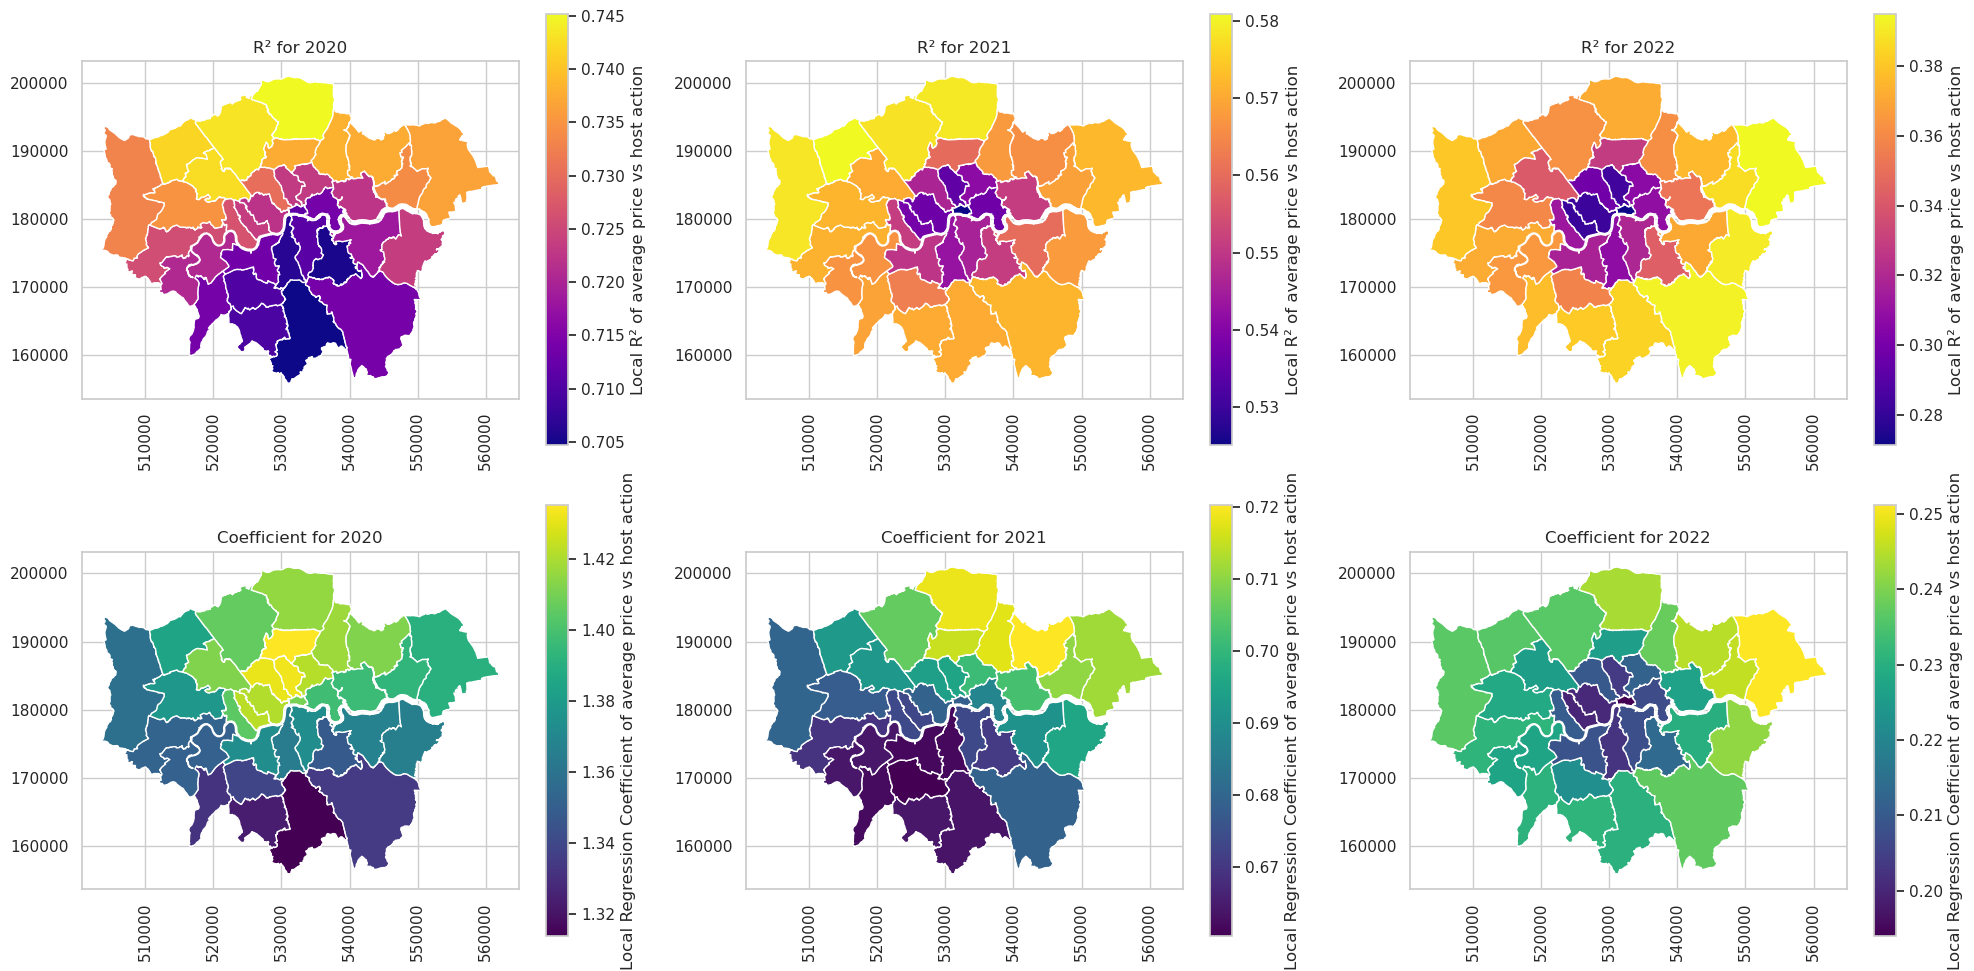

In [147]:
# Setting up the subgraph layout
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # 2 行 3 列

# Define a list of column name prefixes
years = ['2020', '2021', '2022']
r2_columns = [f'local_R2_avg_price_{year}_vs_host_action_{year}' for year in years]
param_columns = [f'local_params_avg_price_{year}_vs_host_action_{year}' for year in years]

# R² mapped for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=r2_columns[i], ax=axs[0, i], legend=True,
                           legend_kwds={'label': "Local R² of average price vs host action"},
                           cmap='plasma')  # Using viridis colour mapping
    axs[0, i].set_title(f'R² for {year}')
    axs[0, i].axis('on')  
    axs[0, i].tick_params(axis='x', labelrotation=90)

# Mapping of coefficients for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=param_columns[i], ax=axs[1, i], legend=True,
                           legend_kwds={'label': "Local Regression Coefficient of average price vs host action"},
                           cmap='viridis')  # Using viridis colour mapping
    axs[1, i].set_title(f'Coefficient for {year}')
    axs[0, i].axis('on') 
    axs[1, i].tick_params(axis='x', labelrotation=90)

# Adjust subgraph spacing
plt.tight_layout()

# Display graphics
plt.show()
